# FIN-429: Homework 2

Group 8: Sana Almagbaly, Nadège Bärtschi, Clara Bottinelli, Zélia Décaillet

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import pycountry

In [3]:
pip install openpyxl

In [4]:
repository_url = "https://raw.githubusercontent.com/baertsch/FIN-429/main/"
# Revenues (annual frequency)
rev_y = pd.read_excel(repository_url+"DS_REV_USD_Y.xlsx")
# Return index (monthly frequency)
ri_m = pd.read_excel(repository_url+"DS_RI_USD_M.xlsx")
# Return index (annual frequency)
ri_y = pd.read_excel(repository_url+"DS_RI_USD_Y.xlsx")
# Scope 1
scope1 = pd.read_excel(repository_url+"Scope_1.xlsx")
# Scope 2
scope2 = pd.read_excel(repository_url+"Scope_2.xlsx")
# Market capitalization (monthly frequency)
mv_m = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")
# Market capitalization (annual frequency)
mv_y = pd.read_excel(repository_url+"DS_MV_T_USD_Y.xlsx")
#risk free rate over the period
rf_rate = pd.read_excel(repository_url+ "Risk_Free_Rate.xlsx")


In [5]:
rf_rate['Date'] = pd.to_datetime(rf_rate['Unnamed: 0'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
rf_rate=rf_rate.drop(columns=["Unnamed: 0"])
rf_rate['Date'] = rf_rate['Date'].apply(lambda d: d.replace(day=28) if d.month == 2 else d)

rf_rate['Date'] = pd.to_datetime(rf_rate['Date'])
rf_rate['Year'] = rf_rate['Date'].dt.year


annual_rf = rf_rate.groupby('Year')['RF'].mean().reset_index()
annual_rf['Simple_Annualized_RF'] = annual_rf['RF'] * 12
annual_rf['Compounded_Annualized_RF'] = (1 + annual_rf['RF'] / 100) ** 12 - 1

avg_rf_rate = annual_rf['Simple_Annualized_RF'].mean()
avg_rf_rate #in percentage


np.float64(1.768)

In [ ]:
mv_m

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
0,SCHLUMBERGER,AN8068571086,30859.99,33574.85,40611.13,43352.43,43387.86,41861.39,42466.02,42074.79,...,78342.00,67864.94,65592.31,67436.13,68571.81,62465.84,59239.83,56585.01,62050.05,53708.59
1,ALUAR,ARALUA010258,1129.31,1328.64,1395.07,1362.23,1340.19,1317.78,1209.89,1395.69,...,2915.90,2698.60,3165.16,3033.34,2875.18,2694.70,2494.63,2381.96,2635.60,2425.22
2,BANCO BBVA ARGENTINA,ARP125991090,1656.3,1570.39,1851.34,1656.82,1388.70,1352.22,1541.05,1551.54,...,2192.63,2435.11,3210.54,2818.34,2409.49,2832.34,2697.85,3274.73,3745.74,4516.58
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1414.37,1407.47,1463.08,1460.01,1356.04,893.05,955.70,990.45,...,4698.80,4340.63,5146.56,4829.15,4589.92,3971.89,3870.75,3641.89,4278.73,3903.71
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4985.97,5043.53,5210.65,4935.22,4950.74,5129.83,4947.90,4652.68,4819.74,4835.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,ALTRON LIMITED A,ZAE000191342,105.41,115.91,106.13,113.98,90.17,76.58,74.37,85.52,...,239.09,248.89,280.70,295.36,388.98,393.90,413.00,427.45,460.04,463.34
2560,ABSA GROUP,ZAE000255915,2882.25,2649.35,2483.04,2348.10,2295.91,2374.43,2458.35,2347.50,...,6996.32,6906.91,7086.12,7760.90,7856.60,8858.64,9105.44,8530.48,8540.85,8993.55
2561,NORTHAM PLATINUM HLDGS,ZAE000298253,230.57,259.71,207.52,249.66,193.50,206.19,264.77,300.82,...,2363.04,2632.31,2730.05,2762.38,3107.39,2352.88,2507.23,2918.45,2467.31,2045.45
2562,AVENG,ZAE000302618,436.66,445.83,454.09,389.04,351.95,276.11,312.53,299.24,...,39.68,42.32,39.84,48.32,61.15,71.10,70.09,66.52,78.76,84.89


In [6]:
# Filter for European firms
european_countries = ["AT", "BE", "DK", "FI", "FR", "DE", "IE", "IT", "NL",
                       "NO", "PT", "ES", "SE", "CH", "GB"]
def filter_europe(df, codes):
    df['Country Code']=df['ISIN'].str[:2]
    df = df[df['Country Code'].isin(codes)]
    return df
rev_y = filter_europe(rev_y,european_countries)
ri_m = filter_europe(ri_m,european_countries)
ri_y = filter_europe(ri_y,european_countries)
scope1 = filter_europe(scope1,european_countries)
scope2 = filter_europe(scope2,european_countries)
mv_m = filter_europe(mv_m,european_countries)
mv_y = filter_europe(mv_y,european_countries)


In [7]:
# For missing values between two availables years, we take the value of the previous year
rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_m.iloc[:,2:-1] = ri_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_y.iloc[:,2:-1] = ri_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope1.iloc[:,2:-1] = scope1.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope2.iloc[:,2:-1] = scope2.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_m.iloc[:,2:-1] = mv_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_y.iloc[:,2:-1] = mv_y.iloc[:,2:-1].fillna(method='ffill', axis=1)

<ipython-input-7-2bfe9f11a561>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
<ipython-input-7-2bfe9f11a561>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
<ipython-input-7-2bfe9f11a561>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4              NaN
5         305807.0
6              NaN
7        3234567.0
8        3641376.0
           ...    
1710    13802441.0
1711     4183335.0
1712      552860.0
1713           NaN
1714      988070.0
Name: 2000, Length: 622, 

# Question 1 - Homework 2


In [8]:
rev_y.sort_values(by=['ISIN'])

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Country Code
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,5761485.0,6701638.0,8313667.0,...,14624782.0,13253295.0,16607143.0,17285776.0,17179157.0,17737447.0,17510122.0,18204892.0,19004987.0,AT
5,FLUGHAFEN WIEN,AT00000VIE62,357249.0,305807.0,305384.0,278328.0,344581.0,442898.0,511025.0,490443.0,...,729250.0,792599.0,925938.0,908088.0,940299.0,401262.0,465858.0,740695.0,1002124.0,AT
6,RAIFFEISEN BANK INTL.,AT0000606306,NaN,NaN,NaN,NaN,1401165.0,2187083.0,3063455.0,3625903.0,...,7787607.0,6886678.0,8719097.0,8551016.0,8547916.0,8686445.0,8710116.0,13677850.0,16046061.0,AT
7,ERSTE GROUP BANK,AT0000652011,3798881.0,3234567.0,3968691.0,4630331.0,7729897.0,8544454.0,9123401.0,9316336.0,...,10405710.0,9414287.0,10521777.0,11062628.0,11061612.0,11212186.0,11127545.0,15186926.0,24866232.0,AT
8,TELEKOM AUSTRIA,AT0000720008,3821392.0,3641376.0,2624838.0,2312566.0,3374304.0,5046696.0,5204697.0,5217405.0,...,4487217.0,4408514.0,5261344.0,4932388.0,4900212.0,5368088.0,5340506.0,5256454.0,5550113.0,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,ELECTROLUX B,SE0016589188,14983581.0,13802441.0,13045425.0,12783711.0,15718302.0,17293149.0,17039539.0,16635481.0,...,14584603.0,13661824.0,15200352.0,13447557.0,12354475.0,13820849.0,13776030.0,12696006.0,12838228.0,SE
1711,ATLAS COPCO A,SE0017486889,4301641.0,4183335.0,4875491.0,4813931.0,5614674.0,6218743.0,6871404.0,6776823.0,...,12063522.0,11435078.0,14498117.0,10331183.0,10773577.0,11893248.0,12162022.0,13302662.0,16487046.0,SE
1712,MODERN TIMES GROUP MTG B,SE0018012494,497736.0,552860.0,569095.0,602657.0,711036.0,879633.0,965406.0,1029450.0,...,1915077.0,1951689.0,2183914.0,2138756.0,440471.0,476388.0,581828.0,521188.0,556590.0,SE
1713,WIHLBORGS FASTIGHETER,SE0018012635,NaN,NaN,NaN,NaN,82163.0,97980.0,100132.0,97524.0,...,230617.0,229026.0,285925.0,290772.0,309742.0,366379.0,335543.0,313917.0,370582.0,SE


In [9]:
rev = rev_y.melt(id_vars=["NAME", "ISIN", "Country Code"], var_name="Date", value_name="Revenue")
rev = rev[(rev["Date"] >= 2014) & (rev["Date"] <= 2024)] #Takes period 2014-2024
nb = rev.groupby("NAME").size() # Number of observations per firm
rev = rev[rev["NAME"].isin(nb[nb == 11].index)] # Keep only firms with 11 observations
rev.sort_values(by=["ISIN", "Date"], inplace=True)
rev['Revenue'] = pd.to_numeric(rev['Revenue'], errors='coerce')

Source: https://augmentationdecapital.atos.net/pdf/PR-Launch_of_capital_increase_with_preferential_subscription_rights-November82024.pdf

In [10]:
rev.dropna(inplace=True)
display(rev.columns)
display(rev.head())

Index(['NAME', 'ISIN', 'Country Code', 'Date', 'Revenue'], dtype='object')

,NAME,ISIN,Country Code,Date,Revenue
9330,STRABAG SE,AT000000STR1,AT,2014,16990473.0
9952,STRABAG SE,AT000000STR1,AT,2015,14153527.0
10574,STRABAG SE,AT000000STR1,AT,2016,14624782.0
11196,STRABAG SE,AT000000STR1,AT,2017,13253295.0
11818,STRABAG SE,AT000000STR1,AT,2018,16607143.0


In [11]:
scope1.dropna(inplace=True)
scope2.dropna(inplace=True)

In [12]:
scope1.head()

,NAME,ISIN,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Country Code
6,RAIFFEISEN BANK INTL.,AT0000606306,305.0,305.0,208.0,6027.0,6508.0,5944.0,7073.0,6221.0,4827.0,6060.0,6060.0,AT
7,ERSTE GROUP BANK,AT0000652011,32749.0,32749.0,49122.0,22630.0,27854.0,27332.0,29950.0,24929.0,21530.0,20707.0,18701.0,AT
8,TELEKOM AUSTRIA,AT0000720008,27476.0,27476.0,27446.0,27419.0,27867.0,27003.0,22758.0,21411.0,21316.0,21316.0,24048.0,AT
9,ANDRITZ,AT0000730007,105229.0,105229.0,76563.0,64155.0,63396.0,71677.0,22452.0,25968.0,25968.0,24090.0,53194.0,AT
10,OMV,AT0000743059,12907485.0,12800000.0,11900000.0,11000000.0,11100000.0,11100000.0,10600000.0,10700000.0,13900000.0,11700000.0,10000000.0,AT


In [13]:
#Merge both dataset to have only the firms that have both scope 1 & scope 2 emissions
# _scope1 or _scope2 to distinguish them
merge_df = pd.merge(scope1, scope2, on=['NAME','ISIN', 'Country Code'], suffixes=('_scope1', '_scope2'))
merge_df.head()

,NAME,ISIN,2013_scope1,2014_scope1,2015_scope1,2016_scope1,2017_scope1,2018_scope1,2019_scope1,2020_scope1,...,2014_scope2,2015_scope2,2016_scope2,2017_scope2,2018_scope2,2019_scope2,2020_scope2,2021_scope2,2022_scope2,2023_scope2
0,RAIFFEISEN BANK INTL.,AT0000606306,305.0,305.0,208.0,6027.0,6508.0,5944.0,7073.0,6221.0,...,327.0,164.0,25801.0,26621.0,26283.0,49708.0,46427.0,41064.0,35111.0,35111.0
1,ERSTE GROUP BANK,AT0000652011,32749.0,32749.0,49122.0,22630.0,27854.0,27332.0,29950.0,24929.0,...,80456.0,115063.0,54377.0,48635.0,34211.0,34884.0,32562.0,22884.0,18686.0,13153.0
2,TELEKOM AUSTRIA,AT0000720008,27476.0,27476.0,27446.0,27419.0,27867.0,27003.0,22758.0,21411.0,...,195246.0,176186.0,178038.0,190621.0,217310.0,193222.0,226294.0,176340.0,176340.0,115241.0
3,ANDRITZ,AT0000730007,105229.0,105229.0,76563.0,64155.0,63396.0,71677.0,22452.0,25968.0,...,192698.0,177491.0,140336.0,139209.0,169143.0,75411.0,108149.0,108149.0,80021.0,81035.0
4,OMV,AT0000743059,12907485.0,12800000.0,11900000.0,11000000.0,11100000.0,11100000.0,10600000.0,10700000.0,...,300000.0,400000.0,400000.0,300000.0,286079.0,400000.0,300000.0,1100000.0,900000.0,800000.0


In [14]:
# Identify the years from the existing scope columns
years = sorted(set(col.split('_')[0] for col in merge_df.columns if '_scope' in col))

# List to keep track of columns to drop
cols_to_drop = []

# For each year, create a new column with total emissions (scope1 + scope2)
for year in years:
    scope1_col = f"{year}_scope1"
    scope2_col = f"{year}_scope2"
    total_col = year

    if scope1_col in merge_df.columns and scope2_col in merge_df.columns:
        merge_df[total_col] = merge_df[scope1_col] + merge_df[scope2_col]

        # Mark scope columns for deletion
        cols_to_drop.extend([scope1_col, scope2_col])

# Drop the scope1 and scope2 columns
merge_df.drop(columns=cols_to_drop, inplace=True)
merge_df.head()

,NAME,ISIN,Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,632.0,632.0,372.0,31828.0,33129.0,32227.0,56781.0,52648.0,45891.0,41171.0,41171.0
1,ERSTE GROUP BANK,AT0000652011,AT,113205.0,113205.0,164185.0,77007.0,76489.0,61543.0,64834.0,57491.0,44414.0,39393.0,31854.0
2,TELEKOM AUSTRIA,AT0000720008,AT,222722.0,222722.0,203632.0,205457.0,218488.0,244313.0,215980.0,247705.0,197656.0,197656.0,139289.0
3,ANDRITZ,AT0000730007,AT,297927.0,297927.0,254054.0,204491.0,202605.0,240820.0,97863.0,134117.0,134117.0,104111.0,134229.0
4,OMV,AT0000743059,AT,13572634.0,13100000.0,12300000.0,11400000.0,11400000.0,11386079.0,11000000.0,11000000.0,15000000.0,12600000.0,10800000.0


In [15]:
merge_df = merge_df.melt(id_vars=['NAME', 'ISIN', 'Country Code'], var_name='Date', value_name='TotalCarbon')
merge_df.head()

,NAME,ISIN,Country Code,Date,TotalCarbon
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2013,632.0
1,ERSTE GROUP BANK,AT0000652011,AT,2013,113205.0
2,TELEKOM AUSTRIA,AT0000720008,AT,2013,222722.0
3,ANDRITZ,AT0000730007,AT,2013,297927.0
4,OMV,AT0000743059,AT,2013,13572634.0


In [16]:
rev['ISIN'].nunique()

621

In [17]:
merge_df['Date'] = merge_df['Date'].astype(int)
df = pd.merge(rev, merge_df, on=['NAME', 'ISIN', 'Country Code', 'Date'],how='inner')
df.head()
df3=df #saving for question 3 homework 2

In [ ]:
df['ISIN'].nunique()

467

152 firms were dropped due to unavailable carbon data.

In [18]:
obs = df.groupby("ISIN").size().reset_index() # Number of observations per firm
keep = obs[obs[0] == 10]['ISIN'] # Firms with less than 11 observations
df= df[df["ISIN"].isin(keep)] # Keep only firms with 11 observations
df.head()

,NAME,ISIN,Country Code,Date,Revenue,TotalCarbon
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014,11542265.0,632.0
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2015,8685177.0,372.0
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2016,7787607.0,31828.0
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2017,6886678.0,33129.0
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2018,8719097.0,32227.0


In [19]:
data = df.groupby(['NAME', 'ISIN', 'Country Code'])[['TotalCarbon', 'Revenue']].mean().reset_index()
data.head()

,NAME,ISIN,Country Code,TotalCarbon,Revenue
0,3I GROUP,GB00B1YW4409,GB,533.9,1480176.7
1,4IMPRINT GROUP,GB0006640972,GB,3092.4,646495.8
2,A P MOLLER MAERSK B,DK0010244508,DK,35445900.0,45804417.6
3,A2A,IT0001233417,IT,7174858.1,9298433.5
4,ABB LTD N,CH0012221716,CH,906088.7,32836502.4


In [20]:
data['Carbon_Intensity'] = data['TotalCarbon'] / data['Revenue']
data.head()

,NAME,ISIN,Country Code,TotalCarbon,Revenue,Carbon_Intensity
0,3I GROUP,GB00B1YW4409,GB,533.9,1480176.7,0.000361
1,4IMPRINT GROUP,GB0006640972,GB,3092.4,646495.8,0.004783
2,A P MOLLER MAERSK B,DK0010244508,DK,35445900.0,45804417.6,0.773853
3,A2A,IT0001233417,IT,7174858.1,9298433.5,0.771620
4,ABB LTD N,CH0012221716,CH,906088.7,32836502.4,0.027594


In [23]:
# carbon intensity average per country
country_avg = data.groupby('Country Code')['Carbon_Intensity'].mean().reset_index()
def alpha2_to_alpha3(alpha2):
    try:
        return pycountry.countries.get(alpha_2=alpha2).alpha_3
    except:
        return None

country_avg['iso3'] = country_avg['Country Code'].apply(alpha2_to_alpha3)
country_avg

,Country Code,Carbon_Intensity,iso3
0,AT,0.218972,AUT
1,BE,0.166094,BEL
2,CH,0.181917,CHE
3,DE,0.235536,DEU
4,DK,0.146635,DNK
5,ES,0.196772,ESP
6,FI,0.182086,FIN
7,FR,0.143730,FRA
8,GB,0.110517,GBR
9,IE,0.154265,IRL


In [26]:
# Create choropleth
fig = px.choropleth(
    country_avg,
    locations="iso3",  # Now using ISO-3 codes
    locationmode="ISO-3",
    color="Carbon_Intensity",
    hover_name="iso3",
    color_continuous_scale="YlOrRd",
    projection="natural earth",
    title="Average Carbon Intensity in Europe"
)

# Zoom in on Europe
fig.update_geos(
    scope="europe",
    showcountries=True,
    showcoastlines=True,
    showland=True,
    fitbounds="locations"
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

In [27]:
data['ISIN'].nunique()

467

In [28]:
data['Carbon_Intensity'].describe()

,Carbon_Intensity
count,467.000000
mean,0.165972
std,0.507365
min,0.000038
25%,0.006786
50%,0.026938
75%,0.081705
max,6.022585


In [29]:
# Identify ISIN codes in df but not in data
missing_isin = set(df['ISIN']) - set(data['ISIN'])

# Display the missing ISIN codes
print("ISIN codes in df but not in data (no carbon intensity data):")
print(missing_isin)

ISIN codes in df but not in data (no carbon intensity data):
set()


In [30]:
print(df[df['ISIN'] == 'IE00B010DT83'])

Empty DataFrame
Columns: [NAME, ISIN, Country Code, Date, Revenue, TotalCarbon]
Index: []


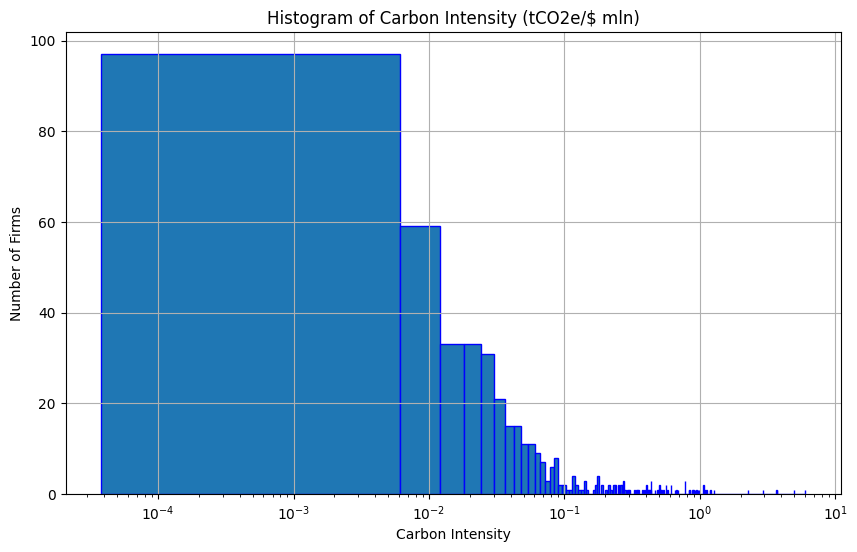

In [31]:
plt.figure(figsize=(10,6))
plt.hist(data['Carbon_Intensity'], bins=1000, edgecolor='blue')
plt.title(f"Histogram of Carbon Intensity (tCO2e/$ mln)")
plt.xlabel("Carbon Intensity")
plt.ylabel("Number of Firms")
plt.xscale('log')
plt.grid(True)
plt.show()

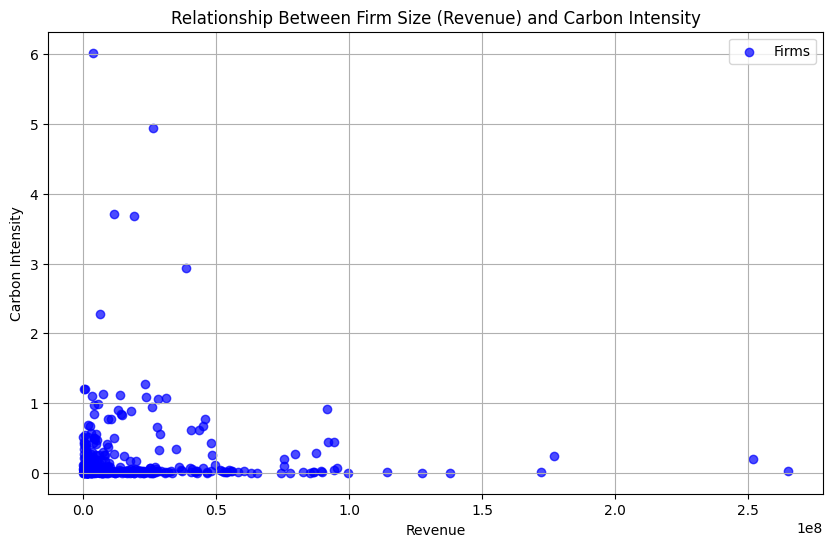

In [32]:
from scipy.stats import linregress

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Revenue'], data['Carbon_Intensity'], alpha=0.7, color='blue', label='Firms')

# Labels and title
plt.xlabel('Revenue')
plt.ylabel('Carbon Intensity')
plt.title('Relationship Between Firm Size (Revenue) and Carbon Intensity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install statsmodels


                             OLS Regression Results                             
Dep. Variable:     log_Carbon_Intensity   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                   0.02178
Date:                  Sat, 29 Mar 2025   Prob (F-statistic):              0.883
Time:                          19:04:12   Log-Likelihood:                -972.82
No. Observations:                   467   AIC:                             1950.
Df Residuals:                       465   BIC:                             1958.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7172      0.

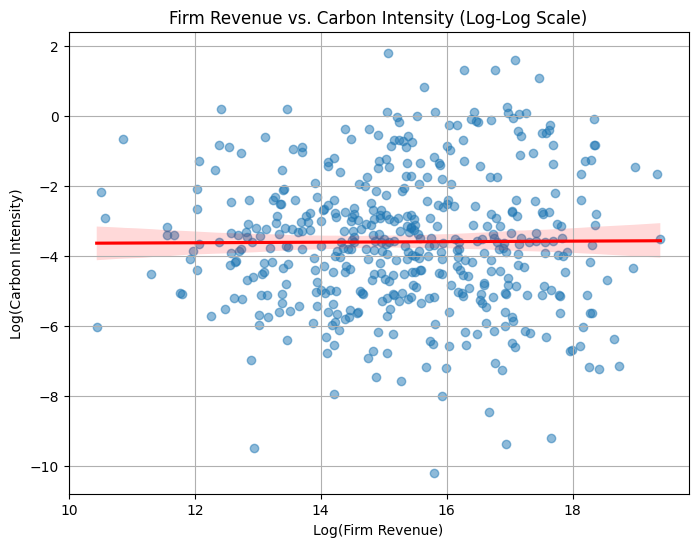

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data['log_Revenue'] = np.log(data['Revenue'])
data['log_Carbon_Intensity'] = np.log(data['Carbon_Intensity'])
data = data.replace([np.inf, -np.inf], np.nan).dropna()

X = sm.add_constant(data['log_Revenue'])  # Add intercept
y = data['log_Carbon_Intensity']
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=data['log_Revenue'], y=data['log_Carbon_Intensity'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Log(Firm Revenue)")
plt.ylabel("Log(Carbon Intensity)")
plt.title("Firm Revenue vs. Carbon Intensity (Log-Log Scale)")
plt.grid(True)
plt.show()

   Quantile  Coefficient   P-value
0      0.10    -0.194062  0.018692
1      0.25    -0.093414  0.192163
2      0.50    -0.012682  0.832959
3      0.75     0.101591  0.225670
4      0.90     0.183911  0.043066


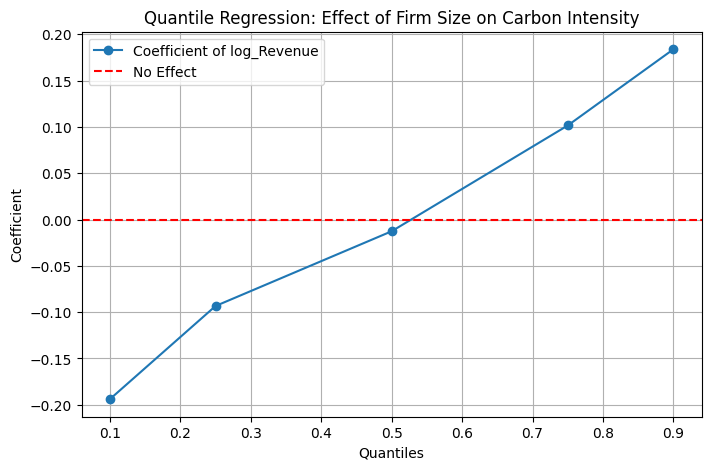

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define the quantiles to test
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Create an empty list to store results
results_list = []

# Run quantile regressions for each quantile
for q in quantiles:
    quant_reg = smf.quantreg('log_Carbon_Intensity ~ log_Revenue', data).fit(q=q)
    results_list.append({
        "Quantile": q,
        "Coefficient": quant_reg.params['log_Revenue'],
        "P-value": quant_reg.pvalues['log_Revenue']
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
print(results_df)

# Plot the coefficients across quantiles
plt.figure(figsize=(8, 5))
plt.plot(results_df["Quantile"], results_df["Coefficient"], marker='o', linestyle='-', label="Coefficient of log_Revenue")
plt.axhline(y=0, color='r', linestyle='--', label="No Effect")
plt.xlabel("Quantiles")
plt.ylabel("Coefficient")
plt.title("Quantile Regression: Effect of Firm Size on Carbon Intensity")
plt.legend()
plt.grid(True)
plt.show()


# Question 2 - Homework 1

In [ ]:
scope1.dropna(inplace=True)
scope2.dropna(inplace=True)

In [ ]:
#Merge both dataset to have only the firms that have both scope 1 & scope 2 emissions
# _scope1 or _scope2 to distinguish them
merge_df = pd.merge(scope1, scope2, on=['NAME','ISIN', 'Country Code'], suffixes=('_scope1', '_scope2'))
merge_df

,NAME,ISIN,2013_scope1,2014_scope1,2015_scope1,2016_scope1,2017_scope1,2018_scope1,2019_scope1,2020_scope1,...,2014_scope2,2015_scope2,2016_scope2,2017_scope2,2018_scope2,2019_scope2,2020_scope2,2021_scope2,2022_scope2,2023_scope2
0,RAIFFEISEN BANK INTL.,AT0000606306,305.0,305.0,208.0,6027.0,6508.0,5944.0,7073.0,6221.0,...,327.0,164.0,25801.0,26621.0,26283.0,49708.0,46427.0,41064.0,35111.0,35111.00
1,ERSTE GROUP BANK,AT0000652011,32749.0,32749.0,49122.0,22630.0,27854.0,27332.0,29950.0,24929.0,...,80456.0,115063.0,54377.0,48635.0,34211.0,34884.0,32562.0,22884.0,18686.0,13153.00
2,TELEKOM AUSTRIA,AT0000720008,27476.0,27476.0,27446.0,27419.0,27867.0,27003.0,22758.0,21411.0,...,195246.0,176186.0,178038.0,190621.0,217310.0,193222.0,226294.0,176340.0,176340.0,115241.00
3,ANDRITZ,AT0000730007,105229.0,105229.0,76563.0,64155.0,63396.0,71677.0,22452.0,25968.0,...,192698.0,177491.0,140336.0,139209.0,169143.0,75411.0,108149.0,108149.0,80021.0,81035.00
4,OMV,AT0000743059,12907485.0,12800000.0,11900000.0,11000000.0,11100000.0,11100000.0,10600000.0,10700000.0,...,300000.0,400000.0,400000.0,300000.0,286079.0,400000.0,300000.0,1100000.0,900000.0,800000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,BILLERUD AKTIEBOLAG,SE0000862997,145629.0,90000.0,82000.0,86000.0,89700.0,89700.0,108000.0,108000.0,...,25800.0,23900.0,30800.0,1800.0,1800.0,7000.0,7000.0,3000.0,3000.0,84000.00
464,NOBIA,SE0000949331,33359.0,33359.0,21020.0,22500.0,21400.0,11700.0,11700.0,10200.0,...,19860.0,18108.0,14300.0,2900.0,9800.0,9800.0,13600.0,9600.0,9600.0,9033.00
465,HUSQVARNA B,SE0001662230,37584.0,37584.0,33656.0,34371.0,33494.0,33494.0,29929.0,29929.0,...,129695.0,131565.0,117675.0,79922.0,79922.0,46856.0,46856.0,5878.0,116713.0,75681.23
466,SAS DEAD - DELIST.14/08/24,SE0003366871,3820671.0,3890000.0,3822000.0,4122000.0,4376000.0,4313000.0,4210000.0,4210000.0,...,30909.0,19381.0,18767.0,24200.0,20000.0,19700.0,19700.0,5700.0,5600.0,5600.00


In [ ]:
ri_m.columns = [pd.to_datetime(col, errors='ignore') if '-' in str(col) else col for col in ri_m.columns]

ri = ri_m.melt(id_vars=["NAME", "ISIN", "Country Code"], var_name="Date", value_name="Return_Index")
ri["Date"] = pd.to_datetime(ri["Date"], errors='coerce')
ri = ri[(ri["Date"] >= '2013-12-29') & (ri["Date"] <= '2024-12-31')] #Takes period 2014-2024
nb = ri.groupby("NAME").size() # Number of observations per firm
ri = ri[ri["NAME"].isin(nb[nb == 133].index)] # Keep only firms with 133 observations
ri.sort_values(by=["ISIN", "Date"], inplace=True)
ri['Monthly_Return'] = ri.groupby('ISIN')['Return_Index'].pct_change() #Computes returns
ri.dropna(subset=['Monthly_Return'], inplace=True)
ri.columns

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/1755118725.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  ri_m.columns = [pd.to_datetime(col, errors='ignore') if '-' in str(col) else col for col in ri_m.columns]
/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/1755118725.py:9: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ri['Monthly_Return'] = ri.groupby('ISIN')['Return_Index'].pct_change() #Computes returns


Index(['NAME', 'ISIN', 'Country Code', 'Date', 'Return_Index',
       'Monthly_Return'],
      dtype='object')

In [ ]:
# Identify firms with inf values in indiv_return, the inf values are due to 0 returns
# Only 4 firms had inf values
inf_firms = ri[ri['Monthly_Return'].isin([np.inf, -np.inf])]['NAME'].unique()

# Drop firms with inf values
ri = ri[~ri['NAME'].isin(inf_firms)]

In [ ]:
firms = merge_df['ISIN'].unique()
df = ri[ri['ISIN'].isin(firms)]
df['ISIN'].nunique()

466

152 firms were dropped due to unavailable carbon data.

In [ ]:
mv_m = mv_m.melt(id_vars=["NAME", "ISIN", "Country Code"], var_name="Date", value_name="Market Cap")
mv_m["Date"] = pd.to_datetime(mv_m["Date"], errors='coerce')
mv_m.dropna(inplace=True)
mv_m = mv_m[(mv_m["Date"] >= '2013-12-29') & (mv_m["Date"] <= '2024-12-31')]
mv_m.sort_values(by=["ISIN", "Date"], inplace=True)
mv_m

,NAME,ISIN,Country Code,Date,Market Cap
104496,STRABAG SE,AT000000STR1,AT,2013-12-31,3349.2
105118,STRABAG SE,AT000000STR1,AT,2014-01-31,3397.49
105740,STRABAG SE,AT000000STR1,AT,2014-02-28,3108.08
106362,STRABAG SE,AT000000STR1,AT,2014-03-31,2953.82
106984,STRABAG SE,AT000000STR1,AT,2014-04-30,3185.05
...,...,...,...,...,...
184733,BOLIDEN ORD SHS,SE0020050417,SE,2024-08-30,8386.34
185355,BOLIDEN ORD SHS,SE0020050417,SE,2024-09-30,9295.42
185977,BOLIDEN ORD SHS,SE0020050417,SE,2024-10-31,8455.81
186599,BOLIDEN ORD SHS,SE0020050417,SE,2024-11-29,8151.08


In [ ]:
obs = mv_m.groupby("ISIN").size().reset_index() # Number of observations per firm
keep = obs[obs[0] == 133]['ISIN'] # Firms with less than 133 observations
mv_m= mv_m[mv_m["ISIN"].isin(keep)] # Keep only firms with 133 observations

In [ ]:
df = pd.merge(df, mv_m, on=['NAME', 'ISIN', 'Country Code', 'Date'],how='inner')
df.head()

,NAME,ISIN,Country Code,Date,Return_Index,Monthly_Return,Market Cap
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-01-31,117.81,0.136723,11260.11
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-02-28,106.90,-0.092607,10217.37
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-03-31,102.24,-0.043592,9771.79
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-04-30,96.70,-0.054186,9241.74
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014-05-30,102.77,0.062771,9822.5


In [ ]:
ew = df
ew["Year"] = ew["Date"].dt.year

# Group by firm (ISIN) and year, then calculate the annual average return
df_avg = ew.groupby(["NAME", "ISIN", "Country Code", "Year"]).agg(
    {"Monthly_Return": "mean"}
).reset_index()
# Convert to annualized return
df_avg["Annualized_Return"] = df_avg["Monthly_Return"] * 12  # Annualization

# Display the result
display(df_avg)

,NAME,ISIN,Country Code,Year,Monthly_Return,Annualized_Return
0,3I GROUP,GB00B1YW4409,GB,2014,0.014421,0.173058
1,3I GROUP,GB00B1YW4409,GB,2015,0.007101,0.085207
2,3I GROUP,GB00B1YW4409,GB,2016,0.023735,0.284819
3,3I GROUP,GB00B1YW4409,GB,2017,0.033440,0.401280
4,3I GROUP,GB00B1YW4409,GB,2018,-0.013757,-0.165085
...,...,...,...,...,...,...
5121,ZURICH INSURANCE GROUP,CH0011075394,CH,2020,0.011069,0.132832
5122,ZURICH INSURANCE GROUP,CH0011075394,CH,2021,0.008990,0.107882
5123,ZURICH INSURANCE GROUP,CH0011075394,CH,2022,0.012836,0.154034
5124,ZURICH INSURANCE GROUP,CH0011075394,CH,2023,0.012568,0.150813


In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
test = df
test = df.groupby(["NAME", "Year"])
display(test)

In [ ]:
df = df.sort_values(by=['Date'])

# Compute Equal Weights per Month
df["Equal_Weight"] = df.groupby("Date")["Monthly_Return"].transform(lambda x: 1 / len(x))

# Compute Market Weights per Month
df["Market_Weight"] = df.groupby("Date")["Market Cap"].transform(lambda x: x / x.sum())

# Compute Individual Firm Returns
df["Equal_Weight_Return"] = df["Equal_Weight"] * df["Monthly_Return"]
# Compute Market-Weight Returns Using Previous Period Weights
df["Market_Weight_Return"] = df["Monthly_Return"] * df["Market_Weight"].shift(1)

# Compute Portfolio-Level Returns
df_ew = df.groupby("Date")["Equal_Weight_Return"].sum().reset_index().rename(columns={"Equal_Weight_Return": "R_ew"})
df_vw = df.groupby("Date")["Market_Weight_Return"].sum().reset_index().rename(columns={"Market_Weight_Return": "R_vw"})

# Merge into Portfolio DataFrame
portfolio_returns = pd.merge(df_ew, df_vw, on="Date")
portfolio_returns

,Date,R_ew,R_vw
0,2014-01-31,-0.012127,-0.009776
1,2014-02-28,0.077449,0.08371
2,2014-03-31,-0.009897,-0.006603
3,2014-04-30,0.008862,-0.000989
4,2014-05-30,0.009523,0.011204
...,...,...,...
127,2024-08-30,0.022443,0.027811
128,2024-09-30,0.013332,0.010869
129,2024-10-31,-0.057441,-0.04937
130,2024-11-29,0.352925,0.007795


In [ ]:
portfolio_returns= pd.merge(portfolio_returns, rf_rate[["Date", "RF"]], on="Date", how="inner")
portfolio_returns

,Date,R_ew,R_vw,RF
0,2014-01-31,-0.012127,-0.009776,0.00
1,2014-02-28,0.077449,0.08371,0.00
2,2014-03-31,-0.009897,-0.006603,0.00
3,2014-04-30,0.008862,-0.000989,0.00
4,2014-06-30,-0.003726,-0.002022,0.00
...,...,...,...,...
88,2024-05-31,0.068113,0.075415,0.44
89,2024-07-31,0.046515,0.049231,0.45
90,2024-09-30,0.013332,0.010869,0.40
91,2024-10-31,-0.057441,-0.04937,0.39


In [ ]:
portfolio_returns["R_ew_excess"] = portfolio_returns["R_ew"] - (portfolio_returns["RF"] / 100)
portfolio_returns["R_vw_excess"] = portfolio_returns["R_vw"] - (portfolio_returns["RF"] / 100)

In [ ]:
def compute_annualized_stats(returns, excess_returns):
    mean_return = np.mean(returns) * 12  # Annualized Return
    volatility = np.std(returns) * np.sqrt(12)  # Annualized Volatility
    sharpe_ratio = np.mean(excess_returns) * 12 / volatility # Sharpe Ratio
    min_return = np.min(returns)
    max_return = np.max(returns)
    return mean_return, volatility, sharpe_ratio, min_return, max_return

# Compute statistics for both portfolios
stats_ew = compute_annualized_stats(portfolio_returns["R_ew"],portfolio_returns["R_ew_excess"])
stats_vw = compute_annualized_stats(portfolio_returns["R_vw"],portfolio_returns["R_vw_excess"])

# Store results in DataFrames
performance_stats = pd.DataFrame({
    "Portfolio": ["Equally Weighted", "Market-Cap Weighted"],
    "Annualized Return": [stats_ew[0], stats_vw[0]],
    "Annualized Volatility": [stats_ew[1], stats_vw[1]],
    "Sharpe Ratio": [stats_ew[2], stats_vw[2]],
    "Minimum Return": [stats_ew[3], stats_vw[3]],
    "Maximum Return": [stats_ew[4], stats_vw[4]],
})
# Display Results
# Display Results
print("Portfolio Performance Statistics:")
print(performance_stats)
print("\nPortfolio Returns:")
print(portfolio_returns.head())
print("\nUpdated Dataset with Individual Firm Weights and Returns:")
print(df.head())
#print('Equal Weighted Portfolio:')


#annualized_return = portfolio_returns['R_ew'].mean() * 12
#print('Annualized Average Return', round(annualized_return,4))

#annualized_volatility = portfolio_returns['R_vw'].std() * math.sqrt(12)
#print('Annualized Volatility', round(annualized_volatility,4))

#sharpe_ratio = (annualized_return - 0) / annualized_volatility
#print('Annualized Sharpe Ratio', round(sharpe_ratio, 2))

#print('Min. return', (df['Equal_Weight_Return']).min())
#print('Max. return', (df['Equal_Weight_Return']).max())

Portfolio Performance Statistics:
             Portfolio  Annualized Return  Annualized Volatility  \
0     Equally Weighted           0.027717                0.20959   
1  Market-Cap Weighted           0.027715                0.20753   

   Sharpe Ratio  Minimum Return  Maximum Return  
0      0.060645       -0.234276        0.236707  
1      0.061238       -0.225577        0.215792  

Portfolio Returns:
        Date      R_ew      R_vw   RF  R_ew_excess R_vw_excess
0 2014-01-31 -0.012127 -0.009776  0.0    -0.012127   -0.009776
1 2014-02-28  0.077449   0.08371  0.0     0.077449     0.08371
2 2014-03-31 -0.009897 -0.006603  0.0    -0.009897   -0.006603
3 2014-04-30  0.008862 -0.000989  0.0     0.008862   -0.000989
4 2014-06-30 -0.003726 -0.002022  0.0    -0.003726   -0.002022

Updated Dataset with Individual Firm Weights and Returns:
                                          NAME          ISIN Country Code  \
0                        RAIFFEISEN BANK INTL.  AT0000606306           AT   


In [ ]:
ew = (df.groupby(df['Date'].dt.to_period('M'))['Equal_Weight_Return']).sum()
mw = (df.groupby(df['Date'].dt.to_period('M'))['Market_Weight_Return']).sum()

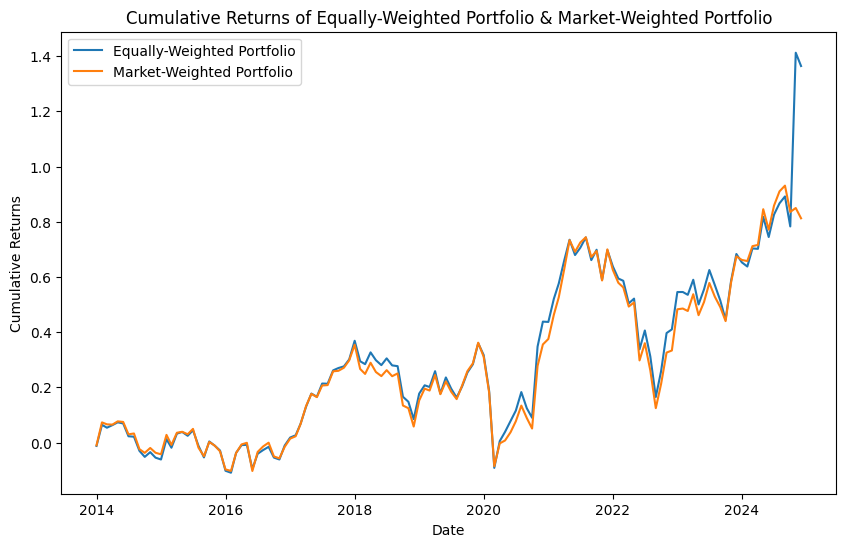

In [ ]:
ew_cum =((1+ew).cumprod())-1
mw_cum = ((1+mw).cumprod())-1

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(ew_cum.index.to_timestamp(), ew_cum, label='Equally-Weighted Portfolio')
plt.plot(mw_cum.index.to_timestamp(),mw_cum, label='Market-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Cumulative Returns of Equally-Weighted Portfolio & Market-Weighted Portfolio')
plt.show()

# Question 3 - Homework 1

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [ ]:
##filter ri_m for companies w available S1 & S2 data
isin_list = merge_df['ISIN'].unique()
ri_m_filtered = ri_m[ri_m['ISIN'].isin(isin_list)]


In [ ]:
ri_m_filtered

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00,Country Code
6,RAIFFEISEN BANK INTL.,AT0000606306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.37,70.38,78.90,80.27,80.70,72.48,78.94,82.80,92.42,AT
7,ERSTE GROUP BANK,AT0000652011,102.94,94.91,97.74,100.50,96.13,97.86,102.06,102.43,...,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69,AT
8,TELEKOM AUSTRIA,AT0000720008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294.09,311.40,300.32,319.06,318.44,268.58,268.82,267.24,271.32,AT
9,ANDRITZ,AT0000730007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4362.47,4534.21,4680.73,4824.62,5195.02,4394.53,4085.93,3709.03,4165.91,AT
10,OMV,AT0000743059,393.88,389.64,318.75,311.41,335.24,356.91,364.63,305.99,...,5258.75,5127.01,4926.84,5128.51,5036.94,4866.52,4711.97,4548.98,4877.34,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,BILLERUD AKTIEBOLAG,SE0000862997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.23,75.30,81.76,85.65,93.43,71.68,71.17,74.60,83.79,SE
1696,NOBIA,SE0000949331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.63,6.93,8.20,9.89,8.82,7.81,5.71,5.81,6.15,SE
1697,HUSQVARNA B,SE0001662230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.76,26.04,21.92,21.91,22.74,21.49,19.33,17.47,17.98,SE
1698,SAS DEAD - DELIST.14/08/24,SE0003366871,11.15,10.27,10.15,10.45,10.44,9.85,9.90,9.54,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,SE


In [ ]:
# Remove the row corresponding to the specified ISIN code
isin_to_remove = "IE00B010DT83"
ri_m_filtered = ri_m_filtered[ri_m_filtered['ISIN'] != isin_to_remove]

In [ ]:
##filter ri_m for right timeframe

# Identify and filter the date-like columns
non_date_cols = ['NAME', 'ISIN', 'Country Code']
date_cols = [col for col in ri_m_filtered.columns if col not in non_date_cols]
date_cols_dt = pd.to_datetime(date_cols, errors='coerce')  # Convert valid ones

# Filter only the dates within the 2013-2023 range
filtered_dates = [col for col, dt in zip(date_cols, date_cols_dt) if dt and (dt.year >= 2013 and dt.year <= 2023)]
ri_m_filtered = ri_m_filtered[non_date_cols + filtered_dates]

In [ ]:
#ensure the columns are numeric
ri_m_filtered = ri_m_filtered.apply(pd.to_numeric, errors='coerce')

#compute monthly percentage change
returns = ri_m_filtered.pct_change(axis=1).dropna(axis=1)
returns

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/4155934254.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = ri_m_filtered.pct_change(axis=1).dropna(axis=1)


,2013-02-28,2013-03-29,2013-04-30,2013-05-31,2013-06-28,2013-07-31,2013-08-30,2013-09-30,2013-10-31,2013-11-29,...,2023-03-31,2023-04-28,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-29,2023-10-31,2023-11-30,2023-12-29
6,-0.156024,-0.100846,0.037526,-0.031482,-0.148959,0.100742,0.128355,-0.043392,0.123908,0.003055,...,-0.081744,-0.001806,-0.048842,0.084443,0.024553,-0.114002,0.016808,-0.011780,0.216305,0.235378
7,-0.041134,-0.135031,0.124498,0.051145,-0.179389,0.143278,0.054999,-0.011263,0.116744,-0.001007,...,-0.159552,0.096425,-0.055749,0.084865,0.082676,-0.055996,-0.028955,0.026651,0.135025,0.002103
8,-0.106276,-0.006362,0.044160,-0.001415,-0.068645,0.097371,0.033890,0.169709,-0.016942,0.033042,...,0.008567,0.035115,-0.069749,0.066050,0.031433,-0.015604,0.082439,-0.001653,0.137076,0.065391
9,0.072859,-0.026010,-0.029411,-0.165538,-0.058578,0.050709,0.021193,0.069807,0.048582,0.030087,...,0.128811,-0.040136,-0.177063,0.041700,-0.048629,0.005277,-0.049560,-0.093913,0.183516,0.147588
10,0.057668,-0.022653,0.104058,0.016407,-0.026544,-0.020687,0.042734,0.072744,-0.032961,0.027289,...,-0.061027,0.030082,-0.060449,0.076645,0.066760,0.026882,0.033643,-0.088870,-0.022912,0.028517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.045564,-0.051038,0.025153,-0.007580,-0.012864,-0.003054,-0.031658,0.113478,0.164804,0.033501,...,-0.114791,-0.066755,-0.118839,-0.025880,0.126073,-0.042351,0.140168,-0.006979,0.055278,0.039319
1696,-0.079205,-0.044602,0.087069,0.005453,0.005424,0.252529,0.082369,0.023626,0.088921,-0.005578,...,0.013449,-0.150664,-0.076287,-0.058706,-0.146934,-0.221809,-0.106688,-0.012478,0.146209,0.283465
1697,-0.040486,-0.046414,0.011799,-0.007289,-0.080764,0.142173,0.049650,0.033311,-0.092843,0.022033,...,-0.027576,0.005224,-0.145137,0.227964,0.088402,-0.122807,-0.106667,-0.142206,0.185114,0.076672
1698,0.060811,-0.082803,0.048611,0.000000,-0.125828,0.045455,-0.050725,0.870229,-0.146939,-0.062201,...,-0.090909,-0.300000,0.285714,0.000000,0.000000,0.000000,-0.333333,-0.833333,0.000000,0.000000


In [ ]:
#compute expected returns
expected_returns = returns.mean(axis=1)
expected_returns

6       0.003386
7       0.009374
8       0.006716
9       0.005547
10      0.009153
          ...   
1695    0.005892
1696   -0.003703
1697    0.009194
1698   -0.014533
1699    0.005673
Length: 467, dtype: float64

In [ ]:
#compute covariance matrix
cov_matrix = returns.T.cov()
cov_matrix

,6,7,8,9,10,12,13,14,15,98,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
6,0.013546,0.008796,0.003378,0.004991,0.006769,0.005866,0.004481,0.006426,0.002821,0.005626,...,0.004196,0.006416,0.001904,0.004338,0.005074,0.002899,0.005139,0.005282,0.001947,0.002416
7,0.008796,0.010637,0.002319,0.003960,0.006448,0.005561,0.004510,0.005191,0.002617,0.005416,...,0.003815,0.005374,0.001984,0.004513,0.005277,0.002294,0.005479,0.005330,0.002332,0.001869
8,0.003378,0.002319,0.003511,0.001834,0.002135,0.002404,0.001855,0.002657,0.001152,0.002222,...,0.002138,0.001966,0.001326,0.001981,0.002882,0.000964,0.002422,0.002203,0.002555,0.001765
9,0.004991,0.003960,0.001834,0.007336,0.003846,0.004320,0.002864,0.004353,0.001670,0.004329,...,0.002570,0.004548,0.001344,0.004138,0.004066,0.002143,0.004493,0.003818,0.002659,0.001447
10,0.006769,0.006448,0.002135,0.003846,0.009457,0.003987,0.003663,0.004330,0.002373,0.005163,...,0.002196,0.004639,0.001654,0.003497,0.003250,0.001982,0.003829,0.003660,0.003933,0.001730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.002899,0.002294,0.000964,0.002143,0.001982,0.003195,0.001697,0.002618,0.001637,0.002408,...,0.002514,0.002819,0.001009,0.002300,0.003330,0.005664,0.003440,0.003552,0.002306,0.001182
1696,0.005139,0.005479,0.002422,0.004493,0.003829,0.005783,0.002887,0.004616,0.003066,0.003715,...,0.004506,0.003848,0.002397,0.004257,0.007380,0.003440,0.012260,0.006313,0.005520,0.002681
1697,0.005282,0.005330,0.002203,0.003818,0.003660,0.006294,0.003285,0.006103,0.003128,0.004225,...,0.003890,0.005419,0.001836,0.004326,0.006740,0.003552,0.006313,0.009822,0.004207,0.002047
1698,0.001947,0.002332,0.002555,0.002659,0.003933,0.005703,0.001797,0.003992,0.002977,0.003926,...,0.004039,0.002973,0.001190,0.002856,0.004765,0.002306,0.005520,0.004207,0.040705,0.001761


In [ ]:
## Constructing the MVP

def min_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)
    init_guess = np.ones(num_assets) / num_assets  #equal weights
    bounds = [(0, 1)] * num_assets  # const 1: o short selling
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # const 2: sum of weights = 1

    def portfolio_volatility(weights):
        return np.sqrt(weights.T @ cov_matrix @ weights)

    result = sco.minimize(portfolio_volatility, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  #optimal weights

min_var_weights = min_variance_portfolio(cov_matrix)
min_var_return = np.dot(min_var_weights, expected_returns)
min_var_volatility = np.sqrt(min_var_weights.T @ cov_matrix @ min_var_weights)

In [ ]:
## Constructing the MRP

def max_return_portfolio(expected_returns, cov_matrix):
    num_assets = len(expected_returns)
    init_guess = np.ones(num_assets) / num_assets  # Equal weights initial guess
    bounds = [(0, 1)] * num_assets  # No short selling constraint
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1

    # Objective function: Negative expected return (since we minimize in scipy)
    def negative_portfolio_return(weights):
        return -np.dot(weights, expected_returns)

    result = sco.minimize(negative_portfolio_return, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  # Optimal weights


max_ret_weights = max_return_portfolio(expected_returns, cov_matrix)
max_ret_return = np.dot(max_ret_weights, expected_returns)
max_ret_volatility = np.sqrt(max_ret_weights.T @ cov_matrix @ max_ret_weights)


In [ ]:
#checking expected return
print(f"MRP Expected Return: {max_ret_return:.6f}")
print(f"MVP Expected Return: {min_var_return:.6f}")
print(f"Does MRP have a higher return than MVP? {max_ret_return > min_var_return}")  #should be true

MRP Expected Return: 0.030923
MVP Expected Return: 0.005417
Does MRP have a higher return than MVP? True


In [ ]:
## Constructing the Efficient Frontier
num_portfolios = 20
def efficient_frontier(expected_returns, cov_matrix, min_var_return, max_ret_return, num_portfolios):
    num_assets = len(cov_matrix)

    def portfolio_volatility(weights, cov_matrix):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    def constraints(target_return, expected_returns, num_assets):
        return (
            {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target_return},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            *({'type': 'ineq', 'fun': lambda x: x[i]} for i in range(num_assets))
        )

    target_returns = np.linspace(min_var_return, max_ret_return, num_portfolios)

    volatilities = []
    returns = []
    weights_list = []

    for target_return in target_returns:
        init_guess = np.ones(num_assets) / num_assets

        result = sco.minimize(portfolio_volatility, init_guess, args=(cov_matrix,),
                              method="SLSQP", constraints=constraints(target_return, expected_returns, num_assets),
                              bounds=[(0, 1)] * num_assets)

        if result.success:
            optimal_weights = result.x
            volatilities.append(portfolio_volatility(optimal_weights, cov_matrix))
            returns.append(np.dot(optimal_weights, expected_returns))
            weights_list.append(optimal_weights)
        else:
            print(f"Optimization failed for target return {target_return}")

    return returns, volatilities, weights_list

# Calculate efficient frontier
returns, volatilities, weights_list = efficient_frontier(expected_returns, cov_matrix, min_var_return, max_ret_return, num_portfolios)



In [ ]:
#define MVP
mvp_index = np.argmin(volatilities)
mvp_return = returns[mvp_index]
mvp_volatility = volatilities[mvp_index]

#define MRP
mrp_index = np.argmax(returns)
mrp_return = returns[mrp_index]
mrp_volatility = volatilities[mrp_index]

In [ ]:
# Initialize lists to store annualized returns and volatilities
annualized_returns = []
annualized_volatilities = []

# Loop through each portfolio in the efficient frontier
for i in range(num_portfolios):
    # Annualize the return and volatility
    annualized_return = returns[i] * 12
    annualized_volatility = volatilities[i] * np.sqrt(12)

    # Append to the lists
    annualized_returns.append(annualized_return)
    annualized_volatilities.append(annualized_volatility)

# Create a DataFrame to store the results
portfolios_df = pd.DataFrame({
    'Annualized Return': annualized_returns,
    'Annualized Volatility': annualized_volatilities
})

# Display the DataFrame
portfolios_df


,Annualized Return,Annualized Volatility
0,0.065004,0.091736
1,0.081113,0.092209
2,0.097222,0.093677
3,0.113330,0.096232
4,0.129439,0.099818
5,0.145548,0.104404
6,0.161657,0.109992
7,0.177766,0.116409
8,0.193875,0.123620
9,0.209984,0.131603


In [ ]:
# Compute the Sharpe ratio for each portfolio
portfolios_df['Sharpe Ratio'] = (portfolios_df['Annualized Return'] - avg_rf_rate/100) / portfolios_df['Annualized Volatility']

# Display the updated DataFrame
portfolios_df

,Annualized Return,Annualized Volatility,Sharpe Ratio
0,0.065004,0.091736,0.515870
1,0.081113,0.092209,0.687921
2,0.097222,0.093677,0.849102
3,0.113330,0.096232,0.993961
4,0.129439,0.099818,1.119627
5,0.145548,0.104404,1.224740
6,0.161657,0.109992,1.308978
7,0.177766,0.116409,1.375198
8,0.193875,0.123620,1.425299
9,0.209984,0.131603,1.461246


In [ ]:
# Calculate Sharpe ratios for MVP and MRP
mvp_sharpe = (mvp_return * 12 - avg_rf_rate/100) / (mvp_volatility * np.sqrt(12))
mrp_sharpe = (mrp_return * 12 - avg_rf_rate/100) / (mrp_volatility * np.sqrt(12))

print(f"Minimum Variance Portfolio (MVP):")
print(f"Annualized Return: {mvp_return * 12:.4f}")
print(f"Annualized Volatility: {mvp_volatility * np.sqrt(12):.4f}")
print(f"Sharpe Ratio: {mvp_sharpe:.4f}")
print("\nMaximum Return Portfolio (MRP):")
print(f"Annualized Return: {mrp_return * 12:.4f}")
print(f"Annualized Volatility: {mrp_volatility * np.sqrt(12):.4f}")
print(f"Sharpe Ratio: {mrp_sharpe:.4f}")

Minimum Variance Portfolio (MVP):
Annualized Return: 0.0650
Annualized Volatility: 0.0917
Sharpe Ratio: 0.5159

Maximum Return Portfolio (MRP):
Annualized Return: 0.3711
Annualized Volatility: 0.4250
Sharpe Ratio: 0.8315


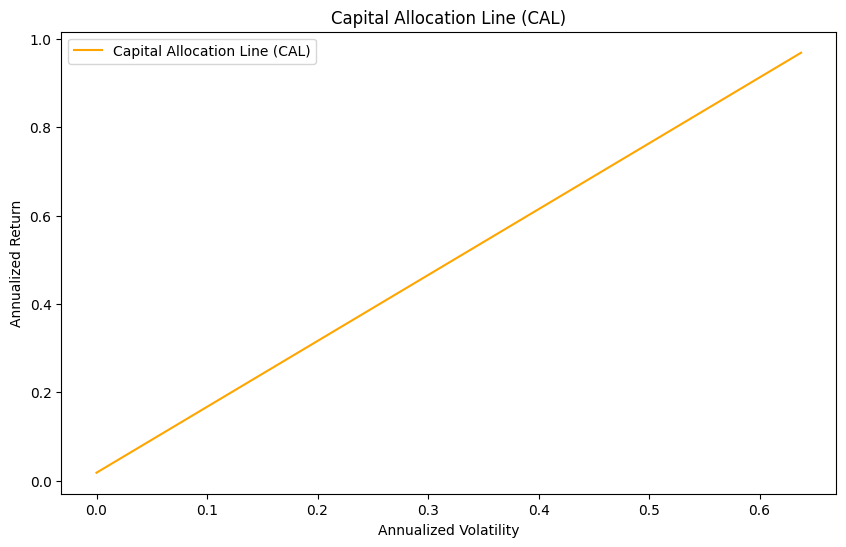

In [ ]:
## constructing the Capital Alloccation Line
# Calculate the Sharpe ratio for the portfolio with the highest Sharpe ratio
max_sharpe_ratio = portfolios_df['Sharpe Ratio'].max()

# Define a range of standard deviations for the CAL
std_dev_range = np.linspace(0, portfolios_df['Annualized Volatility'].max() * 1.5, 100)

# Calculate the expected returns for the CAL
cal_returns = avg_rf_rate/100 + max_sharpe_ratio * std_dev_range

# Plot the CAL
plt.figure(figsize=(10, 6))
plt.plot(std_dev_range, cal_returns, label='Capital Allocation Line (CAL)', color='orange')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Capital Allocation Line (CAL)')
plt.legend()
plt.show()

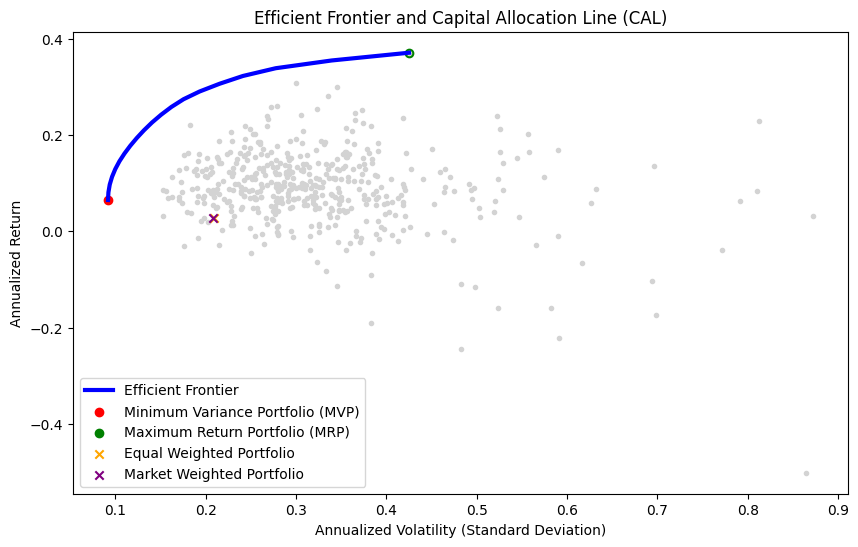

In [ ]:
# Compute statistics for both portfolios
stats_ew = compute_annualized_stats(portfolio_returns["R_ew"], portfolio_returns["R_ew_excess"])
stats_vw = compute_annualized_stats(portfolio_returns["R_vw"], portfolio_returns["R_vw_excess"])

# Extract computed values
equal_weighted_return, equal_weighted_volatility = stats_ew[0], stats_ew[1]
mw_weighted_return, mw_weighted_volatility = stats_vw[0], stats_vw[1]

# Plotting efficient frontier with annualized values and CAL line
plt.figure(figsize=(10, 6))
plt.plot(annualized_volatilities, annualized_returns, label='Efficient Frontier', color='blue', linewidth=3)
plt.scatter(mvp_volatility * np.sqrt(12), mvp_return * 12, color='red', marker='o', label='Minimum Variance Portfolio (MVP)',)
plt.scatter(mrp_volatility * np.sqrt(12), mrp_return * 12, color='green', marker='o', label='Maximum Return Portfolio (MRP)')

# Plot individual assets
for i in range(len(expected_returns)):
    plt.scatter(np.sqrt(cov_matrix.iloc[i, i]) * np.sqrt(12), expected_returns.iloc[i] * 12, color='lightgrey', marker='.')

# Plot the two portfolios using computed values
plt.scatter(equal_weighted_volatility, equal_weighted_return, color='orange', marker='x', label='Equal Weighted Portfolio')
plt.scatter(mw_weighted_volatility, mw_weighted_return, color='purple', marker='x', label='Market Weighted Portfolio')

plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier and Capital Allocation Line (CAL)')
plt.legend()
plt.show()


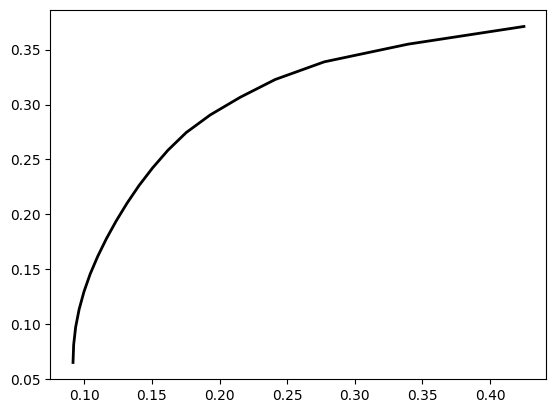

In [ ]:
plt.plot(annualized_volatilities, annualized_returns, label='Efficient Frontier', color='black', linewidth=2)

In [ ]:
## creation of ex-post performance for each portfolio

#match shape & dimensions
weights_list = np.array(weights_list)
weights_list = weights_list.T

#compute portfolio ex-post returns
portfolio_ex_post_returns = np.dot(ri_m_filtered.T, weights_list)

#convert to df
portfolio_ex_post_returns_df = pd.DataFrame(portfolio_ex_post_returns,
                                            index=ri_m_filtered.columns,
                                            columns=[f"Portfolio_{i+1}" for i in range(20)])

print("Portfolio Ex-post Returns DataFrame:")
print(portfolio_ex_post_returns_df.shape)
portfolio_ex_post_returns_df.head()


Portfolio Ex-post Returns DataFrame:
(135, 20)


,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Portfolio_9,Portfolio_10,Portfolio_11,Portfolio_12,Portfolio_13,Portfolio_14,Portfolio_15,Portfolio_16,Portfolio_17,Portfolio_18,Portfolio_19,Portfolio_20
NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 00:00:00,5786.192921,5321.799719,4849.120015,4536.736852,4216.401450,3783.257671,3507.470923,4059.095610,4763.479579,5432.930324,6234.386931,7072.970676,7967.207394,8573.719886,8410.293781,7932.924852,7835.013212,4919.349915,1407.536762,1764.919997
2013-02-28 00:00:00,5721.548168,5278.674173,4823.331561,4518.910372,4208.865597,3780.379434,3481.215094,4008.655472,4691.448466,5338.475265,6117.430218,6935.484371,7807.474466,8390.503798,8215.923730,7732.648858,7617.955289,4770.964095,1347.903165,1683.329998


In [ ]:
# Convert the dataframe to percentage returns
portfolio_ex_post_returns_df_pct = portfolio_ex_post_returns_df.iloc[3:].pct_change()

# Drop the first row of returns since it will be NaN after pct_change()
portfolio_ex_post_returns_df_pct = portfolio_ex_post_returns_df_pct.dropna()

# Display transformed dataframe
print(portfolio_ex_post_returns_df_pct)


                     Portfolio_1  Portfolio_2  Portfolio_3  Portfolio_4  \
2013-02-28 00:00:00    -0.011172    -0.008104    -0.005318    -0.003929   
2013-03-29 00:00:00     0.003158     0.005347     0.014792     0.026489   
2013-04-30 00:00:00     0.043195     0.041285     0.040839     0.040567   
2013-05-31 00:00:00     0.015305     0.016415     0.014873     0.012088   
2013-06-28 00:00:00     0.003398     0.000442    -0.004756    -0.009704   
...                          ...          ...          ...          ...   
2023-08-31 00:00:00    -0.018163    -0.027537    -0.033753    -0.035684   
2023-09-29 00:00:00     0.055425     0.023931     0.004258    -0.002021   
2023-10-31 00:00:00    -0.009866    -0.006670     0.012683     0.026032   
2023-11-30 00:00:00     0.037524     0.051147     0.065379     0.072127   
2023-12-29 00:00:00     0.050089     0.044081     0.037326     0.034399   

                     Portfolio_5  Portfolio_6  Portfolio_7  Portfolio_8  \
2013-02-28 00:00:00    -

In [ ]:
#annnualize returns
annualized_return = ((1 + portfolio_ex_post_returns_df_pct.mean()) ** 12) - 1
annualized_return

Portfolio_1     0.028010
Portfolio_2     0.045166
Portfolio_3     0.089166
Portfolio_4     0.126883
Portfolio_5     0.160671
Portfolio_6     0.195269
Portfolio_7     0.221887
Portfolio_8     0.236950
Portfolio_9     0.245814
Portfolio_10    0.252462
Portfolio_11    0.259642
Portfolio_12    0.266268
Portfolio_13    0.272173
Portfolio_14    0.283470
Portfolio_15    0.298826
Portfolio_16    0.317922
Portfolio_17    0.337663
Portfolio_18    0.339955
Portfolio_19    0.420603
Portfolio_20    0.441164
dtype: float64

In [ ]:
#annualized volatility
annualized_volatility = portfolio_ex_post_returns_df_pct.std() * np.sqrt(12)
annualized_volatility

Portfolio_1     0.136149
Portfolio_2     0.130243
Portfolio_3     0.124435
Portfolio_4     0.128878
Portfolio_5     0.137980
Portfolio_6     0.150045
Portfolio_7     0.161827
Portfolio_8     0.164271
Portfolio_9     0.171613
Portfolio_10    0.179066
Portfolio_11    0.189259
Portfolio_12    0.198761
Portfolio_13    0.208425
Portfolio_14    0.228781
Portfolio_15    0.255346
Portfolio_16    0.286528
Portfolio_17    0.316859
Portfolio_18    0.300370
Portfolio_19    0.389168
Portfolio_20    0.424994
dtype: float64

In [ ]:
#sharpe ratio (assuming risk-free rate is 0%)
sharpe_ratio = (annualized_return - avg_rf_rate /100) / annualized_volatility
sharpe_ratio

Portfolio_1     0.075876
Portfolio_2     0.211035
Portfolio_3     0.574482
Portfolio_4     0.847338
Portfolio_5     1.036321
Portfolio_6     1.183575
Portfolio_7     1.261883
Portfolio_8     1.334805
Portfolio_9     1.329351
Portfolio_10    1.311149
Portfolio_11    1.278466
Portfolio_12    1.250686
Portfolio_13    1.221032
Portfolio_14    1.161769
Portfolio_15    1.101040
Portfolio_16    1.047864
Portfolio_17    1.009859
Portfolio_18    1.072926
Portfolio_19    1.035345
Portfolio_20    0.996447
dtype: float64

In [ ]:
# Create a DataFrame to compile the ex-post performances
ex_post_performance_df = pd.DataFrame({
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

# Display the DataFrame
ex_post_performance_df

,Annualized Return,Annualized Volatility,Sharpe Ratio
Portfolio_1,0.028010,0.136149,0.075876
Portfolio_2,0.045166,0.130243,0.211035
Portfolio_3,0.089166,0.124435,0.574482
Portfolio_4,0.126883,0.128878,0.847338
Portfolio_5,0.160671,0.137980,1.036321
Portfolio_6,0.195269,0.150045,1.183575
Portfolio_7,0.221887,0.161827,1.261883
Portfolio_8,0.236950,0.164271,1.334805
Portfolio_9,0.245814,0.171613,1.329351
Portfolio_10,0.252462,0.179066,1.311149


In [ ]:
##Computation of Ex-Ante Sharpe Ratio

#create the dataframe to match ex-ante timeframe
##filter ri_m for companies w available S1 & S2 data
isin_list = merge_df['ISIN'].unique()
ri_m_ex_ante = ri_m[ri_m['ISIN'].isin(isin_list)]

# Identify and filter the date-like columns
non_date_cols = ['NAME', 'ISIN', 'Country Code']
date_cols = [col for col in ri_m_ex_ante.columns if col not in non_date_cols]
date_cols_dt = pd.to_datetime(date_cols, errors='coerce')  # Convert valid ones

# Filter only the dates within the 2003-2013 range
filtered_dates = [col for col, dt in zip(date_cols, date_cols_dt) if dt and (dt.year >= 2003 and dt.year <= 2013)]
ri_m_ex_ante = ri_m_ex_ante[non_date_cols + filtered_dates]
ri_m_ex_ante = ri_m_ex_ante.drop(columns=['NAME', 'ISIN', 'Country Code'])
ri_m_ex_ante.dropna(how='all', inplace=True)
ri_m_ex_ante

,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-30,2003-06-30,2003-07-31,2003-08-29,2003-09-30,2003-10-31,...,2013-03-29,2013-04-30,2013-05-31,2013-06-28,2013-07-31,2013-08-30,2013-09-30,2013-10-31,2013-11-29,2013-12-31
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.60,98.15,95.06,80.90,89.05,100.48,96.12,108.03,108.36,103.64
7,168.64,168.51,179.67,199.20,216.88,226.34,224.57,235.92,259.05,283.18,...,353.66,397.69,418.03,343.04,392.19,413.76,409.10,456.86,456.40,451.57
8,125.30,128.84,125.37,125.21,134.54,138.68,134.13,127.61,129.52,129.86,...,121.83,127.21,127.03,118.31,129.83,134.23,157.01,154.35,159.45,141.93
9,116.32,120.82,121.08,130.65,144.02,137.92,142.17,148.82,165.93,165.64,...,3558.55,3453.89,2882.14,2713.31,2850.90,2911.32,3114.55,3265.86,3364.12,3326.34
10,461.79,489.54,489.33,544.02,529.21,563.16,532.84,550.68,561.14,599.38,...,2622.29,2895.16,2942.66,2864.55,2805.29,2925.17,3137.96,3034.53,3117.34,3044.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,20.43,22.12,22.75,24.96,24.86,23.37,22.66,25.13,26.00,28.73,...,48.90,50.13,49.75,49.11,48.96,47.41,52.79,61.49,63.55,66.14
1696,8.18,9.77,9.30,10.22,10.38,10.99,10.71,10.96,11.85,11.84,...,26.99,29.34,29.50,29.66,37.15,40.21,41.16,44.82,44.57,43.56
1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.56,13.72,13.62,12.52,14.30,15.01,15.51,14.07,14.38,14.40
1698,7.18,5.16,5.90,6.66,7.23,7.64,7.82,11.13,11.31,12.20,...,1.44,1.51,1.51,1.32,1.38,1.31,2.45,2.09,1.96,1.79


In [ ]:
#compute pct change (returns)
returns_ex_ante = ri_m_ex_ante.pct_change(axis=1)
returns_ex_ante

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/142994914.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_ex_ante = ri_m_ex_ante.pct_change(axis=1)


,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-30,2003-06-30,2003-07-31,2003-08-29,2003-09-30,2003-10-31,...,2013-03-29,2013-04-30,2013-05-31,2013-06-28,2013-07-31,2013-08-30,2013-09-30,2013-10-31,2013-11-29,2013-12-31
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.100846,0.037526,-0.031482,-0.148959,0.100742,0.128355,-0.043392,0.123908,0.003055,-0.043559
7,NaN,-0.000771,0.066228,0.108699,0.088755,0.043619,-0.007820,0.050541,0.098042,0.093148,...,-0.135031,0.124498,0.051145,-0.179389,0.143278,0.054999,-0.011263,0.116744,-0.001007,-0.010583
8,NaN,0.028252,-0.026933,-0.001276,0.074515,0.030772,-0.032809,-0.048610,0.014967,0.002625,...,-0.006362,0.044160,-0.001415,-0.068645,0.097371,0.033890,0.169709,-0.016942,0.033042,-0.109878
9,NaN,0.038686,0.002152,0.079039,0.102334,-0.042355,0.030815,0.046775,0.114971,-0.001748,...,-0.026010,-0.029411,-0.165538,-0.058578,0.050709,0.021193,0.069807,0.048582,0.030087,-0.011230
10,NaN,0.060092,-0.000429,0.111765,-0.027223,0.064152,-0.053839,0.033481,0.018995,0.068147,...,-0.022653,0.104058,0.016407,-0.026544,-0.020687,0.042734,0.072744,-0.032961,0.027289,-0.023289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,NaN,0.082721,0.028481,0.097143,-0.004006,-0.059936,-0.030381,0.109003,0.034620,0.105000,...,-0.051038,0.025153,-0.007580,-0.012864,-0.003054,-0.031658,0.113478,0.164804,0.033501,0.040755
1696,NaN,0.194377,-0.048106,0.098925,0.015656,0.058767,-0.025478,0.023343,0.081204,-0.000844,...,-0.044602,0.087069,0.005453,0.005424,0.252529,0.082369,0.023626,0.088921,-0.005578,-0.022661
1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.046414,0.011799,-0.007289,-0.080764,0.142173,0.049650,0.033311,-0.092843,0.022033,0.001391
1698,NaN,-0.281337,0.143411,0.128814,0.085586,0.056708,0.023560,0.423274,0.016173,0.078691,...,-0.082803,0.048611,0.000000,-0.125828,0.045455,-0.050725,0.870229,-0.146939,-0.062201,-0.086735


In [ ]:
# Compute expected returns
expected_returns_ex_ante = returns_ex_ante.mean(axis=1)
expected_returns_ex_ante

6       0.009210
7       0.017022
8       0.004432
9       0.030326
10      0.019673
          ...   
1695    0.018169
1696    0.022945
1697    0.005223
1698    0.004462
1699    0.013368
Length: 468, dtype: float64

In [ ]:
# Compute the covariance matrix
cov_matrix_ex_ante = returns_ex_ante.T.cov()
cov_matrix_ex_ante

,6,7,8,9,10,12,13,14,15,98,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
6,0.020598,0.017885,0.005767,0.007446,0.008832,0.011776,0.010624,0.011212,0.006080,0.008682,...,0.006378,0.009931,0.006375,0.008008,0.010940,0.011490,0.012355,0.010276,0.009328,0.007243
7,0.017885,0.018850,0.004711,0.006007,0.006896,0.011050,0.009507,0.009146,0.005404,0.008545,...,0.005290,0.007815,0.006094,0.006876,0.009284,0.010020,0.011022,0.011811,0.008972,0.006429
8,0.005767,0.004711,0.006900,0.002824,0.004035,0.004288,0.004258,0.004296,0.002558,0.002771,...,0.002563,0.002780,0.003355,0.003320,0.003780,0.001581,0.002823,0.002882,0.004310,0.003737
9,0.007446,0.006007,0.002824,0.008465,0.005556,0.005433,0.004382,0.006569,0.003671,0.004250,...,0.003534,0.005586,0.003506,0.005158,0.007077,0.005270,0.007521,0.005275,0.005434,0.003872
10,0.008832,0.006896,0.004035,0.005556,0.010259,0.005393,0.004780,0.007228,0.004201,0.004185,...,0.003121,0.004624,0.003428,0.004034,0.005788,0.003815,0.005992,0.006398,0.006401,0.004049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.011490,0.010020,0.001581,0.005270,0.003815,0.012227,0.006929,0.010268,0.003290,0.007127,...,0.005746,0.008128,0.002928,0.006260,0.008925,0.023042,0.013433,0.010912,0.005698,0.005184
1696,0.012355,0.011022,0.002823,0.007521,0.005992,0.010327,0.007961,0.009946,0.004444,0.007099,...,0.006373,0.009331,0.005347,0.008014,0.012932,0.013433,0.021151,0.012075,0.010751,0.006028
1697,0.010276,0.011811,0.002882,0.005275,0.006398,0.010179,0.006757,0.009041,0.004197,0.007056,...,0.005267,0.008707,0.003914,0.006389,0.011161,0.010912,0.012075,0.012035,0.009006,0.005007
1698,0.009328,0.008972,0.004310,0.005434,0.006401,0.009728,0.005810,0.007195,0.005454,0.005958,...,0.004808,0.006230,0.004841,0.006042,0.010763,0.005698,0.010751,0.009006,0.032058,0.004482


In [ ]:
## Constructing the MVP

def min_variance_portfolio_ex_ante(cov_matrix_ex_ante):
    num_assets = len(cov_matrix_ex_ante)
    init_guess = np.ones(num_assets) / num_assets  #equal weights
    bounds = [(0, 1)] * num_assets  # const 1: o short selling
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # const 2: sum of weights = 1

    def portfolio_volatility_ex_ante(weights):
        return np.sqrt(weights.T @ cov_matrix_ex_ante @ weights)

    result = sco.minimize(portfolio_volatility_ex_ante, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  #optimal weights

min_var_weights_ee = min_variance_portfolio_ex_ante(cov_matrix_ex_ante)
min_var_return_ee = np.dot(min_var_weights_ee, expected_returns_ex_ante)
min_var_volatility_ee = np.sqrt(min_var_weights_ee.T @ cov_matrix_ex_ante @ min_var_weights_ee)

In [ ]:
## Constructing the MRP

def max_return_portfolio_ee(expected_returns_ex_ante, cov_matrix_ex_ante):
    num_assets = len(expected_returns_ex_ante)
    init_guess = np.ones(num_assets) / num_assets  # Equal weights initial guess
    bounds = [(0, 1)] * num_assets  # No short selling constraint
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1

    # Objective function: Negative expected return (since we minimize in scipy)
    def negative_portfolio_return_ee(weights):
        return -np.dot(weights, expected_returns_ex_ante)

    result = sco.minimize(negative_portfolio_return_ee, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)
    return result.x  # Optimal weights


max_ret_weights_ee = max_return_portfolio_ee(expected_returns_ex_ante, cov_matrix_ex_ante)
max_ret_return_ee = np.dot(max_ret_weights, expected_returns_ex_ante)
max_ret_volatility_ee = np.sqrt(max_ret_weights_ee.T @ cov_matrix_ex_ante @ max_ret_weights_ee)

ValueError: shapes (467,) and (468,) not aligned: 467 (dim 0) != 468 (dim 0)

In [ ]:
## Constructing the Efficient Frontier (ex-ante timeframe)
num_portfolios = 20
def efficient_frontier_ee(expected_returns_ex_ante, cov_matrix_ex_ante, min_var_return_ee, max_ret_return_ee, num_portfolios):
    num_assets = len(cov_matrix_ex_ante)

    def portfolio_volatility_ee(weights, cov_matrix_ex_ante):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix_ex_ante, weights)))

    def constraints(target_return_ee, expected_returns_ex_ante, num_assets):
        return (
            {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns_ex_ante) - target_return_ee},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            *({'type': 'ineq', 'fun': lambda x: x[i]} for i in range(num_assets))
        )

    target_returns = np.linspace(min_var_return_ee, max_ret_return_ee, num_portfolios)

    volatilities_ee = []
    returns_ee = []
    weights_list_ee = []

    for target_return_ee in target_returns:
        init_guess = np.ones(num_assets) / num_assets

        result = sco.minimize(portfolio_volatility_ee, init_guess, args=(cov_matrix_ex_ante,),
                              method="SLSQP", constraints=constraints(target_return_ee, expected_returns_ex_ante, num_assets),
                              bounds=[(0, 1)] * num_assets)

        if result.success:
            optimal_weights_ee = result.x
            volatilities.append(portfolio_volatility(optimal_weights_ee, cov_matrix_ex_ante))
            returns.append(np.dot(optimal_weights_ee, expected_returns_ex_ante))
            weights_list_ee.append(optimal_weights_ee)
        else:
            print(f"Optimization failed for target return {target_return_ee}")

    return returns_ee, volatilities_ee, weights_list_ee

# Calculate efficient frontier
returns_ee, volatilities_ee, weights_list_ee = efficient_frontier(expected_returns_ex_ante, cov_matrix_ex_ante, min_var_return_ee, max_ret_return_ee, num_portfolios)

In [ ]:
#define MVP_ee
mvp_index_ee = np.argmin(volatilities_ee)
mvp_return_ee = returns_ee[mvp_index_ee]
mvp_volatility_ee = volatilities[mvp_index_ee]

#define MRP_ee
mrp_index_ee = np.argmax(returns_ee)
mrp_return_ee = returns_ee[mrp_index_ee]
mrp_volatility_ee = volatilities_ee[mrp_index_ee]

In [ ]:
##identify and store ex-ante weights

#match shape & dimensions
weights_list = np.array(weights_list)
weights_list = weights_list.T
weights_list_ee = np.array(weights_list_ee)

if weights_list_ee.shape[0] != len(ri_m_ex_ante.index):
    weights_list_ee = weights_list_ee.T  # Flip dimensions if needed


In [ ]:
# Create a DataFrame to store the weights for each portfolio
weights_df = pd.DataFrame(weights_list_ee, index=ri_m_ex_ante.index, columns=[f'Portfolio_{i+1}' for i in range(weights_list_ee.shape[1])])

#compute portfolio ex-post returns
portfolio_ex_ante_returns = np.dot(ri_m_filtered.T, weights_df)

#convert to df
portfolio_ex_ante_returns_df = pd.DataFrame(portfolio_ex_ante_returns,
                                            index=ri_m_filtered.columns,
                                            columns=[f"Portfolio_{i+1}" for i in range(20)])

print("Portfolio Ex-ante Returns DataFrame:")
print(portfolio_ex_ante_returns_df.shape)
portfolio_ex_ante_returns_df

In [ ]:
# Convert the dataframe to percentage returns
portfolio_ex_ante_returns_df_pct = portfolio_ex_ante_returns_df.iloc[3:].pct_change()

# Drop the first row of returns since it will be NaN after pct_change()
portfolio_ex_ante_returns_df_pct = portfolio_ex_ante_returns_df_pct.dropna()

# Display transformed dataframe
print(portfolio_ex_ante_returns_df_pct)

In [ ]:
# Compute the annualized volatility for each portfolio
portfolio_volatility_ex_ante = portfolio_ex_ante_returns_df_pct.std() * np.sqrt(12)

# Display the computed volatilities
portfolio_volatility_ex_ante

In [ ]:
# Compute the ex-ante Sharpe ratio for each portfolio
sharpe_ratio_ex_ante = (annualized_return - avg_rf_rate) / portfolio_volatility_ex_ante

# Display the computed Sharpe ratios
sharpe_ratio_ex_ante


In [ ]:
##Comparison of Ex-Ante & Ex-Post Sharpe Ratios

sharpe_ratio_difference = sharpe_ratio - sharpe_ratio_ex_ante
sharpe_ratio_ratio = sharpe_ratio / sharpe_ratio_ex_ante

sharpe_ratio_comparison_df = pd.DataFrame({
    'Ex-Post Sharpe Ratio': sharpe_ratio,
    'Ex-Ante Sharpe Ratio': sharpe_ratio_ex_ante,
    'Absolute Difference': sharpe_ratio_difference,
    'Ratio (Ex-Post / Ex-Ante)': sharpe_ratio_ratio
})
sharpe_ratio_comparison_df

# Question 2 - Homework 2

In [ ]:
# Convert the 'Carbon_Intensity' column to a numpy array
carbon_intensity_array = data['Carbon_Intensity'].values
carbon_intensity_array

array([3.60700179e-04, 4.78332574e-03, 7.73853306e-01, 7.71620091e-01,
       2.75939468e-02, 6.00641572e-03, 7.31967311e-02, 5.04297645e-01,
       2.55957151e-01, 6.40158346e-02, 2.82748147e-03, 3.66049680e-03,
       2.21628536e-03, 2.79975656e-02, 1.98355072e-03, 4.48474681e-02,
       1.53101529e-02, 1.08044823e-02, 1.73669351e-03, 1.51972543e-02,
       1.65377251e-02, 2.47469527e-02, 5.61464224e-01, 4.06725124e-01,
       4.65731324e-01, 1.09488250e-02, 3.75698556e-01, 6.99322028e-03,
       9.47252326e-04, 5.21307736e-02, 1.03601968e-02, 1.74200324e-01,
       1.91579000e-02, 2.68087197e-02, 7.30591593e-03, 6.45936319e-03,
       4.07139798e-02, 7.92934801e-04, 3.40349481e-02, 3.53555749e-02,
       2.93706927e-02, 1.39148990e-03, 2.02290166e-02, 6.98816195e-03,
       3.40814399e-04, 3.55580355e-03, 2.06506450e-03, 7.65977982e-03,
       3.57691762e-02, 4.84979184e-03, 2.70687185e-01, 4.15197363e-02,
       1.11456511e-01, 1.69228537e-02, 4.06624123e-01, 5.48904914e-03,
      

In [ ]:
#ensure both are numpys
carbon_intensity_array = np.array(carbon_intensity_array)
weights_list = np.array(weights_list)

In [ ]:
# Compute WACI for each portfolio
WACI_portfolios = np.dot(weights_list.T, carbon_intensity_array)
WACI_portfolios_df = pd.DataFrame(WACI_portfolios, columns=["WACI"], index=[f"Portfolio_{i+1}" for i in range(len(WACI_portfolios))])
WACI_portfolios_df

,WACI
Portfolio_1,0.163831
Portfolio_2,0.160552
Portfolio_3,0.124081
Portfolio_4,0.081009
Portfolio_5,0.079692
Portfolio_6,0.072953
Portfolio_7,0.064424
Portfolio_8,0.053919
Portfolio_9,0.045513
Portfolio_10,0.033933


In [ ]:
highest_WACI_portfolio = WACI_portfolios_df.idxmax()[0]
lowest_WACI_portfolio = WACI_portfolios_df.idxmin()[0]

print(f"Portfolio with highest WACI: {highest_WACI_portfolio}")
print(f"Portfolio with lowest WACI: {lowest_WACI_portfolio}")

Portfolio with highest WACI: Portfolio_1
Portfolio with lowest WACI: Portfolio_20


/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/794276571.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_WACI_portfolio = WACI_portfolios_df.idxmax()[0]
/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/794276571.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lowest_WACI_portfolio = WACI_portfolios_df.idxmin()[0]


In [ ]:
# Create a DataFrame from the weights_list array
weights_df = pd.DataFrame(weights_list.T, columns=data['ISIN'])
weights_df = weights_df.T

weights_df.columns = [f"Portfolio_{i+1}" for i in range(weights_list.T.shape[0])] # Rename columns

weights_df.reset_index(inplace=True) # Add ISIN codes as a column
weights_df.rename(columns={'index': 'ISIN'}, inplace=True)

weights_df = weights_df.merge(data[['ISIN', 'Carbon_Intensity']], on='ISIN', how='left') #add carbon intensity value
weights_df

,ISIN,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Portfolio_9,...,Portfolio_12,Portfolio_13,Portfolio_14,Portfolio_15,Portfolio_16,Portfolio_17,Portfolio_18,Portfolio_19,Portfolio_20,Carbon_Intensity
0,GB00B1YW4409,0.000000e+00,4.255019e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.534739e-17,0.000000e+00,...,1.071112e-16,1.084751e-16,8.702061e-18,6.744216e-17,4.164552e-18,1.405752e-16,1.035792e-17,4.193387e-16,5.448290e-17,0.000361
1,GB0006640972,0.000000e+00,8.262996e-17,1.962908e-18,6.295461e-17,2.358851e-17,0.000000e+00,5.951462e-17,0.000000e+00,0.000000e+00,...,0.000000e+00,1.678540e-17,0.000000e+00,0.000000e+00,1.689322e-16,0.000000e+00,0.000000e+00,0.000000e+00,8.015815e-15,0.004783
2,DK0010244508,8.789611e-17,2.331094e-16,0.000000e+00,0.000000e+00,6.913705e-17,2.105631e-17,7.676635e-17,7.673459e-17,9.148662e-17,...,0.000000e+00,6.477254e-17,0.000000e+00,3.068408e-17,9.211554e-17,3.076364e-16,3.893230e-16,0.000000e+00,1.131471e-14,0.773853
3,IT0001233417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700122e-17,0.000000e+00,1.329397e-16,3.162145e-17,1.288552e-16,...,0.000000e+00,0.000000e+00,0.000000e+00,6.250249e-17,2.338820e-16,1.920813e-16,8.425556e-16,0.000000e+00,3.584806e-15,0.771620
4,CH0012221716,0.000000e+00,0.000000e+00,0.000000e+00,4.411943e-17,2.523229e-16,0.000000e+00,4.532261e-17,0.000000e+00,4.471952e-17,...,3.254760e-17,0.000000e+00,1.147083e-16,1.492807e-17,7.694729e-17,3.766289e-16,1.264401e-16,0.000000e+00,3.713726e-17,0.027594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NO0010208051,0.000000e+00,5.181241e-18,0.000000e+00,1.569921e-17,0.000000e+00,0.000000e+00,5.760596e-17,4.537741e-17,0.000000e+00,...,3.391722e-17,0.000000e+00,6.173474e-17,3.673497e-17,4.920447e-17,0.000000e+00,0.000000e+00,4.099498e-16,7.246929e-16,1.107988
463,FI0009800643,0.000000e+00,0.000000e+00,0.000000e+00,1.318385e-17,2.031983e-17,0.000000e+00,0.000000e+00,2.976413e-17,0.000000e+00,...,5.969796e-17,0.000000e+00,6.394196e-17,7.536844e-17,1.539359e-16,0.000000e+00,6.486839e-18,0.000000e+00,8.934260e-15,0.021925
464,ES0184933812,0.000000e+00,1.139172e-16,2.423790e-17,9.173029e-17,0.000000e+00,0.000000e+00,0.000000e+00,1.640508e-17,2.515297e-17,...,2.124017e-17,1.021442e-16,1.322198e-17,2.212677e-17,1.007287e-17,0.000000e+00,0.000000e+00,3.112328e-17,4.735795e-16,0.037623
465,GB00B41H7391,1.536301e-17,0.000000e+00,2.949272e-17,1.967551e-17,0.000000e+00,3.171187e-18,0.000000e+00,9.618492e-18,9.299718e-17,...,1.276619e-16,6.023908e-17,0.000000e+00,2.405495e-20,1.793745e-16,1.937809e-17,0.000000e+00,2.986489e-16,2.079030e-16,0.012263


In [ ]:
# Extract the top 10 carbon intensive firms driving the carbon intensity up
top_firms = data.sort_values(by="Carbon_Intensity", ascending=False).head(10)
top_firms

,NAME,ISIN,Country Code,TotalCarbon,Revenue,Carbon_Intensity,log_Revenue,log_Carbon_Intensity
77,BUZZI,IT0001347308,IT,2.092742e+07,3474823.4,6.022585,15.061054,1.795517
194,HOLCIM,CH0012214059,CH,1.296145e+08,26217584.3,4.943800,17.081941,1.598134
152,EVRAZ SUSP - SUSP.06/12/23,GB00B71N6K86,GB,4.321500e+07,11637122.2,3.713547,16.269711,1.311987
183,HEIDELBERG MATERIALS,DE0006047004,DE,7.073145e+07,19207828.9,3.682428,16.770829,1.303572
348,RWE,DE0007037129,DE,1.136030e+08,38791075.9,2.928586,17.473701,1.074520
125,EASYJET,GB00B7KR2P84,GB,1.418525e+07,6243380.4,2.272047,15.647032,0.820681
236,L AIR LQE.SC.ANYME. POUR L ETUDE ET L EPXTN.,FR0000120073,FR,2.943390e+07,23205435.7,1.268405,16.959897,0.237761
328,REC SILICON,NO0010112675,NO,2.946267e+05,245432.7,1.200438,12.410778,0.182686
363,SECHE ENVIRONNEMENT,FR0000039109,FR,8.385343e+05,701601.2,1.195172,13.461120,0.178290
157,FOMENTO CONSTR.Y CNTR.,ES0122060314,ES,8.328786e+06,7400720.4,1.125402,15.817088,0.118140


In [ ]:
# Filter weights_df for the ISINs in top_firms
top_firms_weights = weights_df[weights_df['ISIN'].isin(top_firms['ISIN'])]
top_firms_weights = top_firms_weights.sort_values(by="Carbon_Intensity", ascending=False)
top_firms_weights

,ISIN,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Portfolio_9,...,Portfolio_12,Portfolio_13,Portfolio_14,Portfolio_15,Portfolio_16,Portfolio_17,Portfolio_18,Portfolio_19,Portfolio_20,Carbon_Intensity
77,IT0001347308,7.093482e-17,2.357757e-17,2.669492e-17,4.425484e-17,0.000000e+00,4.022574e-17,1.489503e-17,0.000000e+00,0.000000e+00,...,0.000000e+00,1.501695e-16,1.825978e-17,1.320676e-16,6.721187e-17,1.728300e-16,0.000000e+00,6.859761e-16,5.679485e-15,6.022585
194,CH0012214059,2.188241e-02,1.897276e-02,9.616137e-03,0.000000e+00,5.175888e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,7.368762e-18,5.868423e-17,3.631354e-17,1.180741e-16,0.000000e+00,6.018309e-16,0.000000e+00,4.131678e-15,4.943800
152,GB00B71N6K86,0.000000e+00,0.000000e+00,0.000000e+00,4.417644e-17,2.851867e-17,0.000000e+00,0.000000e+00,0.000000e+00,5.624203e-17,...,1.697943e-16,1.405489e-16,0.000000e+00,0.000000e+00,0.000000e+00,2.755697e-17,0.000000e+00,0.000000e+00,2.261149e-17,3.713547
183,DE0006047004,0.000000e+00,1.372430e-17,5.779499e-17,0.000000e+00,8.684682e-17,0.000000e+00,3.925491e-17,2.336237e-16,0.000000e+00,...,0.000000e+00,0.000000e+00,4.819288e-17,0.000000e+00,0.000000e+00,1.184269e-16,0.000000e+00,0.000000e+00,0.000000e+00,3.682428
348,DE0007037129,6.204598e-18,5.661479e-17,7.221568e-18,3.494538e-18,1.743902e-18,6.425697e-19,6.001753e-18,4.641113e-17,2.298653e-17,...,3.853141e-17,0.000000e+00,1.193806e-16,1.653784e-16,0.000000e+00,4.510561e-17,6.408712e-16,0.000000e+00,1.015854e-14,2.928586
125,GB00B7KR2P84,9.823137e-17,4.667651e-17,1.552695e-17,3.500842e-17,7.679570e-17,0.000000e+00,7.280983e-19,4.223773e-17,1.776795e-17,...,1.186256e-17,2.489282e-18,5.990904e-17,0.000000e+00,0.000000e+00,0.000000e+00,9.819268e-17,2.260860e-16,0.000000e+00,2.272047
236,FR0000120073,0.000000e+00,4.655887e-17,2.431000e-17,4.539781e-19,0.000000e+00,0.000000e+00,1.648097e-17,0.000000e+00,3.296680e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,8.747394e-17,0.000000e+00,2.204679e-16,2.560588e-16,0.000000e+00,5.086913e-17,1.268405
328,NO0010112675,0.000000e+00,1.137755e-17,0.000000e+00,1.924479e-17,1.579700e-17,0.000000e+00,4.819388e-18,0.000000e+00,7.351130e-19,...,0.000000e+00,8.732350e-17,0.000000e+00,1.593019e-16,6.118625e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.900113e-17,1.200438
363,FR0000039109,2.475522e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.397479e-17,6.467187e-18,2.633432e-17,...,5.828939e-18,2.985507e-17,0.000000e+00,0.000000e+00,0.000000e+00,2.106923e-17,1.287881e-16,2.680173e-16,0.000000e+00,1.195172
157,ES0122060314,1.253822e-17,0.000000e+00,4.217937e-17,1.827748e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.852489e-17,...,0.000000e+00,3.927312e-17,3.305917e-17,1.001299e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.878179e-15,1.125402


In [ ]:
# Sort by Carbon Intensity in ascending order
lowest_firms = data.sort_values(by="Carbon_Intensity", ascending=True).head(10)

# Display the 10 firms with the lowest carbon intensity
print("Top 10 firms with the lowest carbon intensity:")
print(lowest_firms)

Top 10 firms with the lowest carbon intensity:
                                      NAME          ISIN Country Code  \
392                             STOREBRAND  NO0003053605           NO   
209                       INDUSTRIVARDEN A  SE0000190126           SE   
180                         HANNOVER RUECK  DE0008402215           DE   
94   CNP ASSURANCES DEAD - DELIST.20/06/22  FR0000120222           FR   
362                                SCOR SE  FR0010411983           FR   
44                       BANCO DE SABADELL  ES0113860A34           ES   
0                                 3I GROUP  GB00B1YW4409           GB   
386                   ST.JAMES'S PLACE ORD  GB0007669376           GB   
327                                RATOS B  SE0000111940           SE   
399                     SWISS LIFE HOLDING  CH0014852781           CH   

     TotalCarbon     Revenue  Carbon_Intensity  log_Revenue  \
392      272.900   7221282.5          0.000038    15.792543   
209       32.400    418

In [ ]:
# Filter weights_df for the ISINs in the lowest carbon intensity firms
lowest_firms_weights = weights_df[weights_df['ISIN'].isin(lowest_firms['ISIN'])]
lowest_firms_weights = lowest_firms_weights.sort_values(by="Carbon_Intensity", ascending=True)

# Compute the total weight of lowest carbon intensity firms for each portfolio
lowest_firms_total_weights = lowest_firms_weights.iloc[:, 1:-1].sum()

# Compute the total weight of all firms for each portfolio
all_firms_total_weights = weights_df.iloc[:, 1:-1].sum()

# Compute the percentage weight of lowest carbon intensity firms compared to the rest of the firms
lowest_firms_percentage_weights = (lowest_firms_total_weights / all_firms_total_weights) * 100
lowest_firms_percentage_weights = lowest_firms_percentage_weights.sort_values(ascending=False)

# Print the results
print(lowest_firms_percentage_weights)

Portfolio_20    1.634492e-12
Portfolio_19    2.529762e-13
Portfolio_18    1.123290e-13
Portfolio_17    5.222575e-14
Portfolio_15    5.148385e-14
Portfolio_16    3.894352e-14
Portfolio_4     3.453691e-14
Portfolio_10    3.440209e-14
Portfolio_12    3.179923e-14
Portfolio_13    3.133816e-14
Portfolio_8     2.921494e-14
Portfolio_14    2.196136e-14
Portfolio_3     1.954202e-14
Portfolio_7     1.833615e-14
Portfolio_2     1.541425e-14
Portfolio_1     1.304942e-14
Portfolio_5     1.098110e-14
Portfolio_11    1.015384e-14
Portfolio_9     7.898678e-15
Portfolio_6     6.820835e-15
dtype: float64


In [ ]:
# Extract ISIN, Portfolio_18 weights, and Carbon_Intensity
portfolio_18_data = weights_df[['ISIN', 'Portfolio_18', 'Carbon_Intensity']]

portfolio_18_data = portfolio_18_data.dropna(subset=['Carbon_Intensity'])
portfolio_18_data = portfolio_18_data.sort_values(by='Portfolio_18', ascending=False)
portfolio_18_data

,ISIN,Portfolio_18,Carbon_Intensity
245,GB0007388407,5.000512e-01,0.006198
47,GB0031348658,3.931378e-01,0.007660
268,GB0005790059,1.068111e-01,0.050684
53,DE0005200000,1.069368e-15,0.016923
187,DE0006048432,9.783394e-16,0.026143
...,...,...,...
298,AT0000743059,0.000000e+00,0.344761
126,IE00B8KQN827,0.000000e+00,0.043382
300,BE0003735496,0.000000e+00,0.002793
301,NO0003733800,0.000000e+00,0.036697


In [ ]:
# Extract the top 10 carbon intensive firms driving the carbon intensity up
top_firms = data.sort_values(by="Carbon_Intensity", ascending=False).head(10)
top_firms

,NAME,ISIN,Country Code,TotalCarbon,Revenue,Carbon_Intensity,log_Revenue,log_Carbon_Intensity
77,BUZZI,IT0001347308,IT,2.092742e+07,3474823.4,6.022585,15.061054,1.795517
194,HOLCIM,CH0012214059,CH,1.296145e+08,26217584.3,4.943800,17.081941,1.598134
152,EVRAZ SUSP - SUSP.06/12/23,GB00B71N6K86,GB,4.321500e+07,11637122.2,3.713547,16.269711,1.311987
183,HEIDELBERG MATERIALS,DE0006047004,DE,7.073145e+07,19207828.9,3.682428,16.770829,1.303572
348,RWE,DE0007037129,DE,1.136030e+08,38791075.9,2.928586,17.473701,1.074520
125,EASYJET,GB00B7KR2P84,GB,1.418525e+07,6243380.4,2.272047,15.647032,0.820681
236,L AIR LQE.SC.ANYME. POUR L ETUDE ET L EPXTN.,FR0000120073,FR,2.943390e+07,23205435.7,1.268405,16.959897,0.237761
328,REC SILICON,NO0010112675,NO,2.946267e+05,245432.7,1.200438,12.410778,0.182686
363,SECHE ENVIRONNEMENT,FR0000039109,FR,8.385343e+05,701601.2,1.195172,13.461120,0.178290
157,FOMENTO CONSTR.Y CNTR.,ES0122060314,ES,8.328786e+06,7400720.4,1.125402,15.817088,0.118140


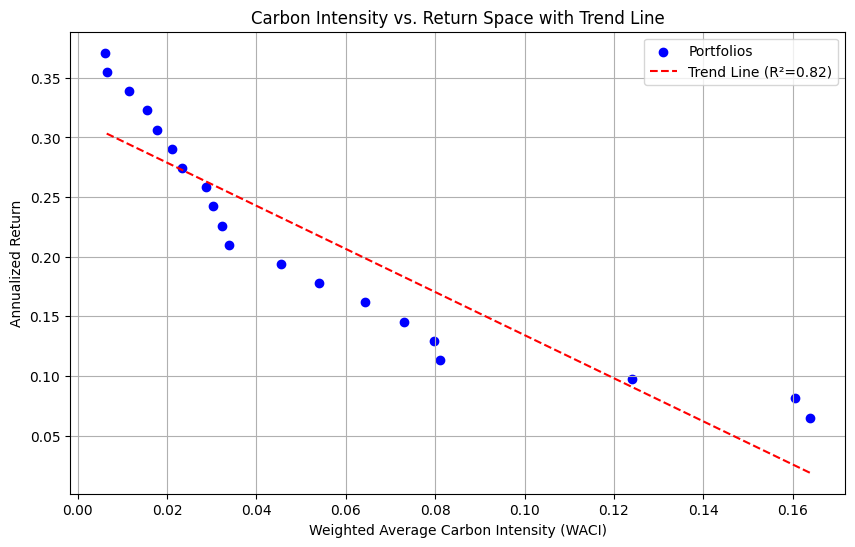

In [ ]:
##Plot the portfolio in the carbon intensity-return space
import numpy as np
from scipy.stats import linregress

# Extract WACI and annualized return for each portfolio
waci_values = WACI_portfolios
annualized_returns = portfolios_df['Annualized Return']

slope, intercept, r_value, p_value, std_err = linregress(waci_values, annualized_returns)
trend_line = slope * waci_values + intercept

plt.figure(figsize=(10, 6))
plt.scatter(waci_values, annualized_returns, color='blue', label='Portfolios')
plt.plot(waci_values, trend_line, color='red', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')

plt.xlabel('Weighted Average Carbon Intensity (WACI)')
plt.ylabel('Annualized Return')
plt.title('Carbon Intensity vs. Return Space with Trend Line')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame for Carbon Intensity vs Return
carbon_intensity_vs_return = pd.DataFrame({
    'Portfolio': [f'Portfolio_{i+1}' for i in range(len(waci_values))],
    'Carbon_Intensity': waci_values,
    'Annualized_Return': annualized_returns
})

# Display the DataFrame
carbon_intensity_vs_return

,Portfolio,Carbon_Intensity,Annualized_Return
0,Portfolio_1,0.163831,0.065004
1,Portfolio_2,0.160552,0.081113
2,Portfolio_3,0.124081,0.097222
3,Portfolio_4,0.081009,0.113330
4,Portfolio_5,0.079692,0.129439
5,Portfolio_6,0.072953,0.145548
6,Portfolio_7,0.064424,0.161657
7,Portfolio_8,0.053919,0.177766
8,Portfolio_9,0.045513,0.193875
9,Portfolio_10,0.033933,0.209984


In [ ]:
# Create a DataFrame summarizing the relationship
summary_df = pd.DataFrame({
    "Statistic": ["Slope", "R-squared", "P-value", "Standard Error"],
    "Value": [slope, r_value**2, p_value, std_err]
})

# Display the summary DataFrame
summary_df

,Statistic,Value
0,Slope,-1.808087e+00
1,R-squared,8.237843e-01
2,P-value,3.313076e-08
3,Standard Error,1.971054e-01


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure weights_list and carbon_intensity_array are numpy arrays
weights_list = weights_list.T
weights_list = np.array(weights_list)
carbon_intensity_array = np.array(weights_df['Carbon_Intensity'])

# Ensure that the lengths match
if weights_list.shape[0] != carbon_intensity_array.shape[0]:
    raise ValueError("The number of firms (rows) in weights_list and carbon_intensity_array must be the same.")

# Create a 4x5 grid layout for the plots
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Carbon Intensity vs. Firm Weights Across Portfolios', fontsize=16)

# Loop through each portfolio and generate a scatter plot
for i, ax in enumerate(axes.flatten()):
    if i < weights_list.shape[1]:  # Ensure we don't exceed the number of portfolios
        portfolio_weights = weights_list[:, i]  # Extract weights for the current portfolio

        # Create a scatter plot
        ax.scatter(carbon_intensity_array, portfolio_weights, alpha=0.7, color='blue')
        ax.set_title(f'Portfolio {i+1}')
        ax.set_xlabel('Carbon Intensity')
        ax.set_ylabel('Firm Weight')
        ax.grid(True)
    else:
        ax.axis('off')  # Turn off unused subplots

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


ValueError: The number of firms (rows) in weights_list and carbon_intensity_array must be the same.

In [ ]:
# Filter the weights_df DataFrame for the specified ISINs
selected_firms = ['CH0012214059', 'GB0000365774', 'DE000BASF111', 'AT0000743059']
selected_weights = weights_df[weights_df['ISIN'].isin(selected_firms)]

# Display the weights for each portfolio
print(selected_weights[['ISIN'] + [f'Portfolio_{i+1}' for i in range(20)]])

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Extract the data for visualization
selected_firms = ['CH0012214059', 'GB0000365774', 'DE000BASF111', 'AT0000743059']
selected_weights = weights_df[weights_df['ISIN'].isin(selected_firms)]

# Set up the data for plotting
portfolios = [f'Portfolio_{i+1}' for i in range(20)]
x = np.arange(len(portfolios))  # the label locations
width = 0.2  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each firm's weights
for i, firm in enumerate(selected_firms):
    ax.bar(x + i * width, selected_weights[selected_weights['ISIN'] == firm][portfolios].values.flatten(),
           width, label=firm)

# Add labels, title, and legend
ax.set_xlabel('Portfolios', fontsize=12)
ax.set_ylabel('Weights', fontsize=12)
ax.set_title('Weights of Selected Firms Across Portfolios', fontsize=14)
ax.set_xticks(x + width * (len(selected_firms) - 1) / 2)
ax.set_xticklabels(portfolios, rotation=45, fontsize=10)
ax.legend(title='Firms (ISIN)', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Sort the columns of the firm_portfolio_matrix to ensure portfolios are in ascending order
firm_portfolio_matrix = firm_portfolio_matrix[sorted(firm_portfolio_matrix.columns)]

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Create a stacked bar plot
firm_portfolio_matrix.plot(kind='barh', stacked=True, colormap='viridis', figsize=(14, 8))

# Add labels and title
plt.xlabel("Total Contribution to Carbon Intensity (Value)", fontsize=12)
plt.ylabel("Firm ISIN", fontsize=12)
plt.title("Top 10 Firms Driving Carbon Intensity Up Across All Portfolios (Breakdown by Portfolio)", fontsize=14)
plt.legend(title="Portfolio", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Extract the weights of the top 10 firms for each portfolio
top_10_weights = top_firms_weights.iloc[:, 1:-1].sum(axis=0)

# Compute the correlation between WACI and the weights of the top 10 firms
correlation = np.corrcoef(waci_values, top_10_weights)[0, 1]

print(f"Correlation between WACI and weight of top 10 firms with highest carbon intensity: {correlation}")

In [ ]:
# Extract the weights of the lowest 10 firms for each portfolio
lowest_10_weights = lowest_firms_weights.iloc[:, 1:-1].sum(axis=0)

# Compute the correlation between WACI and the weights of the top 10 firms
correlation = np.corrcoef(waci_values, lowest_10_weights)[0, 1]

print(f"Correlation between WACI and weight of the 10 lowest carbon intensity: {correlation}")

In [ ]:
plt.scatter(top_10_weights, waci_values)
plt.xlabel("Weight of Top 10 Carbon-Intensive Firms")
plt.ylabel("WACI")
plt.title("Relationship Between WACI and Weight of Top 10 Most Carbon-Intensive Firms")
plt.show()


In [ ]:
plt.figure(figsize=(22, 8))

# Create a boxplot to show the distribution of firm-level carbon intensity for each portfolio
sns.boxplot(data=weights_df.iloc[:, 1:-1], palette="Blues", showmeans=True, meanline=True)

# Labels and title
plt.xlabel("Portfolios")
plt.ylabel("Firm-Level Carbon Intensity")
plt.title("Spread of Firm-Level Carbon Intensity Across Portfolios with Mean and Median")

# Show the plot
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

# Question 4 - Homework 1

In [ ]:
#Getting ri_m with right time frame for rolling window

#Filter ri_m for companies w available S1 & S2 data
isin_list = merge_df['ISIN'].unique()
ri_m_filtered4 = ri_m[ri_m['ISIN'].isin(isin_list)]

#Filter ri_m for right timeframe
# Identify and filter the date-like columns
non_date_cols = ['NAME', 'ISIN', 'Country Code']
date_cols = [col for col in ri_m_filtered4.columns if col not in non_date_cols]
date_cols_dt = pd.to_datetime(date_cols, errors='coerce')  # Convert valid ones
# Count non-NA values for each company across the date columns
ri_m_filtered4['Non-NA Count'] = ri_m_filtered4[date_cols].count(axis=1)

# Filter out companies with less than the expected number of data points (264 months for 2004-2025)
ri_m_filtered4 = ri_m_filtered4[ri_m_filtered4['Non-NA Count'] == len(date_cols)]

# Drop the temporary 'Non-NA Count' column
ri_m_filtered4 = ri_m_filtered4.drop(columns=['Non-NA Count'])

# Display the filtered DataFrame
ri_m_filtered4.head()

# Filter only the dates within the 2014-2025 range
filtered_dates = [col for col, dt in zip(date_cols, date_cols_dt) if dt and (dt.year >= 2004 and dt.year <= 2025)]
ri_m_filtered4 = ri_m_filtered4[non_date_cols + filtered_dates]

# Ensure date columns are numeric, keep metadata intact
ri_m_filtered4[filtered_dates] = ri_m_filtered4[filtered_dates].apply(pd.to_numeric, errors='coerce')
ri_m_filtered4.head()

#Calculate the returns
#ensure the columns are numeric
#ri_m_filtered4 = ri_m_filtered4.apply(pd.to_numeric, errors='coerce')
#ri_m_filtered4

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/1042547919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ri_m_filtered4['Non-NA Count'] = ri_m_filtered4[date_cols].count(axis=1)


,NAME,ISIN,Country Code,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-30 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
7,ERSTE GROUP BANK,AT0000652011,AT,331.27,357.71,383.36,383.34,400.52,407.22,402.69,...,809.93,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69
10,OMV,AT0000743059,AT,745.35,755.68,887.04,856.89,843.94,936.85,1054.58,...,5004.65,5258.75,5127.01,4926.84,5128.51,5036.94,4866.52,4711.97,4548.98,4877.34
12,WIENERBERGER,AT0000831706,AT,4013.35,4283.95,4503.70,4434.09,4733.26,4866.90,5016.87,...,7929.49,8487.39,7519.51,8033.28,7490.26,7511.65,6814.97,6371.38,6284.08,6657.20
13,VIENNA INSURANCE GROUP A,AT0000908504,AT,287.41,337.33,343.13,340.46,340.97,337.02,332.07,...,683.69,732.45,747.63,736.27,788.61,761.94,726.29,701.73,718.77,769.12
14,VOESTALPINE,AT0000937503,AT,254.92,257.06,255.26,244.44,250.65,276.61,276.41,...,1178.95,1279.93,1186.47,1155.64,1103.23,1177.83,933.55,873.40,856.75,949.71


In [ ]:
"IE00B010DT83" in ri_m_filtered4['ISIN'].values

False

In [ ]:
ri_m_filtered4.head()

,NAME,ISIN,Country Code,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-30 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
7,ERSTE GROUP BANK,AT0000652011,AT,331.27,357.71,383.36,383.34,400.52,407.22,402.69,...,809.93,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69
10,OMV,AT0000743059,AT,745.35,755.68,887.04,856.89,843.94,936.85,1054.58,...,5004.65,5258.75,5127.01,4926.84,5128.51,5036.94,4866.52,4711.97,4548.98,4877.34
12,WIENERBERGER,AT0000831706,AT,4013.35,4283.95,4503.70,4434.09,4733.26,4866.90,5016.87,...,7929.49,8487.39,7519.51,8033.28,7490.26,7511.65,6814.97,6371.38,6284.08,6657.20
13,VIENNA INSURANCE GROUP A,AT0000908504,AT,287.41,337.33,343.13,340.46,340.97,337.02,332.07,...,683.69,732.45,747.63,736.27,788.61,761.94,726.29,701.73,718.77,769.12
14,VOESTALPINE,AT0000937503,AT,254.92,257.06,255.26,244.44,250.65,276.61,276.41,...,1178.95,1279.93,1186.47,1155.64,1103.23,1177.83,933.55,873.40,856.75,949.71


In [ ]:
# Drop rows where ISIN is missing (just in case)
ri_m_filtered4 = ri_m_filtered4.dropna(subset=['ISIN'])

# Drop duplicate ISINs if necessary (to avoid duplicate index error)
ri_m_filtered4 = ri_m_filtered4.drop_duplicates(subset='ISIN')

# Set ISIN as the index
ri_m_filtered4 = ri_m_filtered4.set_index('ISIN')

In [ ]:
#Compute monthly percentage change
ri_m_filtered4[filtered_dates] = ri_m_filtered4[filtered_dates].apply(pd.to_numeric, errors='coerce')
returns_matrix = ri_m_filtered4[filtered_dates].pct_change(axis=1).dropna(axis=1)
#returns4 = ri_m_filtered4.pct_change(axis=1).dropna(axis=1)
#returns4.head()

# Define constants
rolling_window = 120  # 10 years * 12 months
returns4=returns_matrix.T.copy()

returns4.columns = ri_m_filtered4.index.astype(str)  # Set ISINs as columns
returns4.index = pd.to_datetime(returns4.index, errors='coerce')

# Ensure the dataframe is sorted by date
#returns4 = returns4.sort_index()
#returns4.index = pd.to_datetime(returns4.index)
print(returns4.index)
print(type(returns4.index))

DatetimeIndex(['2004-02-27', '2004-03-31', '2004-04-30', '2004-05-31',
               '2004-06-30', '2004-07-30', '2004-08-31', '2004-09-30',
               '2004-10-29', '2004-11-30',
               ...
               '2024-04-30', '2024-05-31', '2024-06-28', '2024-07-31',
               '2024-08-30', '2024-09-30', '2024-10-31', '2024-11-29',
               '2024-12-31', '2025-01-31'],
              dtype='datetime64[ns]', length=252, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# Initialize storage for expected returns and covariance matrices
expected_returns_dict = {}
expected_returns_isin_indexed_dict={}
cov_matrices_dict = {}
all_optimal_weights=[]

# Loop through each year from 2014 to 2024
for year in range(2014, 2024):
    end_date = pd.to_datetime(f"{year}-12-31")  # End of the year Y
    start_date = end_date - pd.DateOffset(months=rolling_window)  # 10 years back

    # Select the rolling window data
    df_window = returns4.loc[start_date:end_date]

    print(len(df_window))

    if len(df_window) < rolling_window:
        print(f"Not enough data for {year}, skipping...")
        continue

    # Compute expected returns
    #expected_returns = df_window.sum(axis=0) / rolling_window  # Explicit sum divided by τ
    expected_returns = pd.Series(df_window.sum(axis=0).values / rolling_window, index=df_window.columns.astype(str))
    #expected_returns.index.name = "ISIN"
    expected_returns_isin = expected_returns.copy()
    #expected_returns_isin.index.name = 'ISIN'  # optional but cleaner
    expected_returns_isin_indexed_dict[year] = expected_returns_isin


    # Compute covariance matrix
    mu_Y_plus_1 = expected_returns.values.reshape(-1, 1)  # Reshape for matrix operations
    deviations = df_window - mu_Y_plus_1.T  # Subtract expected return from each month's return
    cov_matrix = (deviations.T @ deviations) / rolling_window  # Matrix multiplication version

    # Store results
    expected_returns_dict[year] = expected_returns
    cov_matrices_dict[year] = cov_matrix

    print(f"Computed expected returns and covariance matrix for {year}")

    #optimal portfolio allocation

    optimal_weights_dict = {}
    # Define the objective function (portfolio variance)
    def portfolio_variance(weights, cov_matrix):
        return weights.T @ cov_matrix @ weights

    # Constraints: sum of weights = 1
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    # Bounds: No short-selling (weights must be >= 0)
    n_assets = len(expected_returns)
    bounds = [(0, 1) for _ in range(n_assets)]

    # Initial guess: Equal weights
    initial_weights = np.ones(n_assets) / n_assets

    # Solve optimization problem
    result = sco.minimize(portfolio_variance, initial_weights, args=(cov_matrix,),
                          method='SLSQP', bounds=bounds, constraints=constraints)

    # Store optimal weights for this year
    if result.success:
      all_optimal_weights.append(result.x)
      print(f"Optimal weights computed for {year}")
    else:
      print(f"Optimization failed for {year}")

# Convert to DataFrame for easy analysis
df_optimal_weights = pd.DataFrame(all_optimal_weights, index=range(2014, 2024)).T
df_optimal_weights.columns = [str(year) for year in range(2014, 2024)]  # Rename index to years if needed
df_optimal_weights.index = returns4.columns

121
Computed expected returns and covariance matrix for 2014
Optimal weights computed for 2014
120
Computed expected returns and covariance matrix for 2015
Optimal weights computed for 2015
120
Computed expected returns and covariance matrix for 2016
Optimal weights computed for 2016
121
Computed expected returns and covariance matrix for 2017
Optimal weights computed for 2017
121
Computed expected returns and covariance matrix for 2018
Optimal weights computed for 2018
121
Computed expected returns and covariance matrix for 2019
Optimal weights computed for 2019
121
Computed expected returns and covariance matrix for 2020
Optimal weights computed for 2020
120
Computed expected returns and covariance matrix for 2021
Optimal weights computed for 2021
121
Computed expected returns and covariance matrix for 2022
Optimal weights computed for 2022
121
Computed expected returns and covariance matrix for 2023
Optimal weights computed for 2023


In [ ]:
#Printing some examples to check values
print("Expected Returns for 2024:\n", expected_returns_dict[2023])
print("Covariance Matrix for 2024:\n", cov_matrices_dict[2023])

Expected Returns for 2024:
 ISIN
AT0000652011    0.009210
AT0000743059    0.008174
AT0000831706    0.012241
AT0000908504    0.000787
AT0000937503    0.003870
                  ...   
SE0000379190    0.008688
SE0000667891    0.009581
SE0000806994    0.006061
SE0003366871   -0.020504
SE0005190238    0.006169
Length: 381, dtype: float64
Covariance Matrix for 2024:
 ISIN          AT0000652011  AT0000743059  AT0000831706  AT0000908504  \
ISIN                                                                   
AT0000652011      0.010639      0.006889      0.005845      0.004515   
AT0000743059      0.006889      0.010061      0.004169      0.003927   
AT0000831706      0.005845      0.004169      0.009213      0.003717   
AT0000908504      0.004515      0.003927      0.003717      0.004416   
AT0000937503      0.005394      0.004624      0.005725      0.003677   
...                    ...           ...           ...           ...   
SE0000379190      0.003808      0.002336      0.004168     

In [ ]:
# Display results
print(df_optimal_weights)

                      2014          2015          2016          2017  \
ISIN                                                                   
AT0000652011  3.753004e-18  4.777297e-18  0.000000e+00  0.000000e+00   
AT0000743059  6.154940e-18  2.228258e-18  0.000000e+00  9.294012e-18   
AT0000831706  1.747107e-17  1.479834e-17  0.000000e+00  5.615782e-18   
AT0000908504  4.208089e-18  8.798420e-18  4.390730e-19  0.000000e+00   
AT0000937503  0.000000e+00  5.814472e-18  0.000000e+00  1.024278e-17   
...                    ...           ...           ...           ...   
SE0000379190  0.000000e+00  0.000000e+00  6.468225e-19  0.000000e+00   
SE0000667891  2.643976e-18  0.000000e+00  2.427893e-18  0.000000e+00   
SE0000806994  8.037080e-19  2.056086e-18  0.000000e+00  1.772413e-18   
SE0003366871  0.000000e+00  0.000000e+00  2.129896e-18  0.000000e+00   
SE0005190238  0.000000e+00  1.265814e-18  0.000000e+00  0.000000e+00   

                      2018          2019          2020         

In [ ]:
#Ex post performance
# Initialize storage for ex-post returns
ex_post_returns = []
# Ensure columns represent dates
df_optimal_weights = df_optimal_weights.T
# Loop through each year (2014-2023)
for year in range(2014, 2024):
    print(f"Computing ex-post returns for {year}...")

    # Get monthly returns for the next year (Y+1)
    start_month = f"{year}-01-01"
    end_month = f"{year}-12-31"

    # Select relevant monthly return data for this year
    df_monthly_returns = returns4.loc[start_month:end_month]

    # Check if the year exists in the optimal weights DataFrame
    if str(year) not in df_optimal_weights.columns:
        print(f"Skipping {year} due to missing optimal weights...")
        continue

    # Get the optimal weights computed at the end of the previous year
    weights = df_optimal_weights[str(year)].copy()

    # Compute monthly returns and update weights dynamically
    for month_idx in range(len(df_monthly_returns)):
        # Extract stock returns for the current month
        monthly_returns = df_monthly_returns.iloc[month_idx]

        # Compute portfolio return using current weights
        portfolio_return = np.dot(weights, monthly_returns)
        ex_post_returns.append(portfolio_return)

        # Update weights for next month using:
        # αi,t+k−1 = αi,t+k−2 × (1 + Ri,t+k−1) / (1 + Rp,t+k−1)
        weights = weights * (1 + monthly_returns) / (1 + portfolio_return)

    print(f"Year {year} processed successfully!")

# Convert ex-post returns into a DataFrame for analysis
df_ex_post_returns = pd.DataFrame(ex_post_returns, columns=["Portfolio Return"])

# Compute portfolio performance statistics
annualized_return = df_ex_post_returns.mean() * 12
annualized_volatility = df_ex_post_returns.std() * np.sqrt(12)
sharpe_ratio = (annualized_return - avg_rf_rate) / annualized_volatility
min_return = df_ex_post_returns.min()
max_return = df_ex_post_returns.max()

# Store results in a DataFrame
performance_metrics = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Min Monthly Return": min_return,
    "Max Monthly Return": max_return
})

# Display results
from IPython.display import display

# Display the DataFrame
display(performance_metrics)

# Compare Against Value-Weighted Portfolio (assuming df_vw_returns is available)
if 'df_vw_returns' in globals():
    annualized_return_vw = df_vw_returns.mean() * 12
    annualized_volatility_vw = df_vw_returns.std() * np.sqrt(12)
    sharpe_ratio_vw = (annualized_return_vw - avg_rf_rate) / annualized_volatility_vw
    min_return_vw = df_vw_returns.min()
    max_return_vw = df_vw_returns.max()

    performance_vw = pd.DataFrame({
        "Annualized Return": annualized_return_vw,
        "Annualized Volatility": annualized_volatility_vw,
        "Sharpe Ratio": sharpe_ratio_vw,
        "Min Monthly Return": min_return_vw,
        "Max Monthly Return": max_return_vw
    })

    display(performance_vw)

Computing ex-post returns for 2014...
Skipping 2014 due to missing optimal weights...
Computing ex-post returns for 2015...
Skipping 2015 due to missing optimal weights...
Computing ex-post returns for 2016...
Skipping 2016 due to missing optimal weights...
Computing ex-post returns for 2017...
Skipping 2017 due to missing optimal weights...
Computing ex-post returns for 2018...
Skipping 2018 due to missing optimal weights...
Computing ex-post returns for 2019...
Skipping 2019 due to missing optimal weights...
Computing ex-post returns for 2020...
Skipping 2020 due to missing optimal weights...
Computing ex-post returns for 2021...
Skipping 2021 due to missing optimal weights...
Computing ex-post returns for 2022...
Skipping 2022 due to missing optimal weights...
Computing ex-post returns for 2023...
Skipping 2023 due to missing optimal weights...


,Annualized Return,Annualized Volatility,Sharpe Ratio,Min Monthly Return,Max Monthly Return
Portfolio Return,NaN,NaN,NaN,NaN,NaN


In [ ]:
#expected_returns_isin_indexed=pd.Series(expected_returns_isin_indexed_dict)

In [ ]:
#expected_returns_isin_indexed_dict

In [ ]:
#expected_returns_isin_indexed

# Question 3 Homework 2

In [ ]:
#reconstructing the df with carbon intensity
#Merge both dataset to have only the firms that have both scope 1 & scope 2 emissions
# _scope1 or _scope2 to distinguish them
merge_df = pd.merge(scope1, scope2, on=['NAME','ISIN', 'Country Code'], suffixes=('_scope1', '_scope2'))
merge_df.head()
# Identify the years from the existing scope columns
years = sorted(set(col.split('_')[0] for col in merge_df.columns if '_scope' in col))

# List to keep track of columns to drop
cols_to_drop = []

# For each year, create a new column with total emissions (scope1 + scope2)
for year in years:
    scope1_col = f"{year}_scope1"
    scope2_col = f"{year}_scope2"
    total_col = year

    if scope1_col in merge_df.columns and scope2_col in merge_df.columns:
        merge_df[total_col] = merge_df[scope1_col] + merge_df[scope2_col]

        # Mark scope columns for deletion
        cols_to_drop.extend([scope1_col, scope2_col])

# Drop the scope1 and scope2 columns
merge_df.drop(columns=cols_to_drop, inplace=True)
merge_df.head()

,NAME,ISIN,Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,632.0,632.0,372.0,31828.0,33129.0,32227.0,56781.0,52648.0,45891.0,41171.0,41171.0
1,ERSTE GROUP BANK,AT0000652011,AT,113205.0,113205.0,164185.0,77007.0,76489.0,61543.0,64834.0,57491.0,44414.0,39393.0,31854.0
2,TELEKOM AUSTRIA,AT0000720008,AT,222722.0,222722.0,203632.0,205457.0,218488.0,244313.0,215980.0,247705.0,197656.0,197656.0,139289.0
3,ANDRITZ,AT0000730007,AT,297927.0,297927.0,254054.0,204491.0,202605.0,240820.0,97863.0,134117.0,134117.0,104111.0,134229.0
4,OMV,AT0000743059,AT,13572634.0,13100000.0,12300000.0,11400000.0,11400000.0,11386079.0,11000000.0,11000000.0,15000000.0,12600000.0,10800000.0


In [ ]:
#calculating carbon intensity per firm per year
df3.head()
c_int3=df3
c_int3['Carbon Intensity']=c_int3['TotalCarbon']/c_int3['Revenue']
c_int3=c_int3.drop(columns=['Revenue','TotalCarbon'])
c_int3=c_int3.rename(columns={'Date':'Year'})
c_int3.head()

,NAME,ISIN,Country Code,Year,Carbon Intensity
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014,0.000055
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2015,0.000043
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2016,0.004087
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2017,0.004811
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2018,0.003696


In [ ]:
#reshaping and formatting mv_y
mv_y3 = mv_y.melt(id_vars=['NAME', 'ISIN', 'Country Code'], var_name='Year', value_name='Value')
mv_y3 = mv_y3.sort_values(['ISIN', 'Year'])
mv_y3=mv_y3.rename(columns={'Value':'Market Cap'})
mv_y3['Year'] = pd.to_numeric(mv_y3['Year'], errors='coerce')
mv_y3 = mv_y3[mv_y3['Year'] >= 2014]
mv_y3

,NAME,ISIN,Country Code,Year,Market Cap
9330,STRABAG SE,AT000000STR1,AT,2014,3239.4
9952,STRABAG SE,AT000000STR1,AT,2015,2586.64
10574,STRABAG SE,AT000000STR1,AT,2016,2822.22
11196,STRABAG SE,AT000000STR1,AT,2017,4096.56
11818,STRABAG SE,AT000000STR1,AT,2018,4482.88
...,...,...,...,...,...
13683,BOLIDEN ORD SHS,SE0020050417,SE,2020,6668.37
14305,BOLIDEN ORD SHS,SE0020050417,SE,2021,9531.88
14927,BOLIDEN ORD SHS,SE0020050417,SE,2022,11765.76
15549,BOLIDEN ORD SHS,SE0020050417,SE,2023,11643.21


In [ ]:
#merging to get a df with market cap and carbon intensity
merged_df3 = pd.merge(mv_y3, c_int3, on=['ISIN', 'Year'], how='inner')
merged_df3=merged_df3.drop(columns=['NAME_y','Country Code_y'])
merged_df3=merged_df3.rename(columns={'NAME_x':'NAME','Country Code_x':'Country Code'})
merged_df3

,NAME,ISIN,Country Code,Year,Market Cap,Carbon Intensity
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014,11718.77,0.000055
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2015,3656.2,0.000043
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2016,3642.06,0.004087
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2017,6466.1,0.004811
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2018,14234.4,0.003696
...,...,...,...,...,...,...
4665,TELE2 B,SE0005190238,SE,2019,8233.53,0.058947
4666,TELE2 B,SE0005190238,SE,2020,10025.07,0.003843
4667,TELE2 B,SE0005190238,SE,2021,8985.78,0.000820
4668,TELE2 B,SE0005190238,SE,2022,9922.15,0.000706


In [ ]:
#calculating relative market cap
for year in merged_df3['Year'].unique():
  # Filter the DataFrame for the current year
  df_year = merged_df3[merged_df3['Year'] == year]

  # Calculate the total market cap for the year
  total_market_cap = df_year['Market Cap'].sum()

  # Calculate the relative market cap for each company in the year
  merged_df3.loc[merged_df3['Year'] == year, 'Rel MC'] = df_year['Market Cap'] / total_market_cap


In [ ]:
merged_df3.head()

,NAME,ISIN,Country Code,Year,Market Cap,Carbon Intensity,Rel MC
0,RAIFFEISEN BANK INTL.,AT0000606306,AT,2014,11718.77,0.000055,0.001497
1,RAIFFEISEN BANK INTL.,AT0000606306,AT,2015,3656.2,0.000043,0.000491
2,RAIFFEISEN BANK INTL.,AT0000606306,AT,2016,3642.06,0.004087,0.000567
3,RAIFFEISEN BANK INTL.,AT0000606306,AT,2017,6466.1,0.004811,0.000937
4,RAIFFEISEN BANK INTL.,AT0000606306,AT,2018,14234.4,0.003696,0.001688


In [ ]:
# Group by year and calculate the product of Rel MC and Carbon Intensity, then sum over all firms.
WACI_y_vw = merged_df3.groupby('Year').apply(lambda x: (x['Rel MC'] * x['Carbon Intensity']).sum()).reset_index(name='WACI_y_vw')

# Display the results
WACI_y_vw

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/1962681340.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  WACI_y_vw = merged_df3.groupby('Year').apply(lambda x: (x['Rel MC'] * x['Carbon Intensity']).sum()).reset_index(name='WACI_y_vw')


,Year,WACI_y_vw
0,2014,0.161399
1,2015,0.178502
2,2016,0.169718
3,2017,0.195820
4,2018,0.159208
5,2019,0.163048
6,2020,0.158530
7,2021,0.155982
8,2022,0.113799
9,2023,0.087829


In [ ]:
# Pivot to firm-year matrix: rows = years, columns = ISINs, values = market cap
market_cap=merged_df3[['ISIN','Year','Market Cap']]
pivot_caps = market_cap.pivot(index='Year', columns='ISIN', values='Market Cap')

# Drop any years with all missing values
pivot_caps.dropna(how='all', inplace=True)

# Initialize dictionary to store VW weights
vw_weights_dict = {}

# Compute weights at end of year Y to be used in year Y+1
for year in range(2013, 2023):  # Up to 2022 for allocation in 2023
    try:
        cap_Y = pivot_caps.loc[year]
        weights = cap_Y / cap_Y.sum()
        vw_weights_dict[year + 1] = weights
    except KeyError:
        print(f"Market cap data missing for {year}, skipping...")
        continue

# Convert to DataFrame
vw_weights_df = pd.DataFrame(vw_weights_dict).T  # rows = year, columns = ISINs

# Optional: align with return data columns
#vw_weights_df = vw_weights_df[returns4.columns]  # keep only firms in your return data

# Preview result
print("Value-weighted portfolio weights constructed:")
display(vw_weights_df.head())

Market cap data missing for 2013, skipping...
Value-weighted portfolio weights constructed:


ISIN,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000831706,AT0000908504,AT0000937503,AT0000938204,BE0003470755,...,SE0000379190,SE0000667891,SE0000667925,SE0000695876,SE0000806994,SE0000862997,SE0000949331,SE0001662230,SE0003366871,SE0005190238
2015,0.001497,0.002105,0.000501,0.000748,0.001844,0.000245,0.000796,0.000983,0.000314,0.001562,...,0.000363,0.002146,0.004219,0.001381,0.000286,0.000323,0.000186,0.000349,0.00012,0.000621
2016,0.000491,0.001343,0.000587,0.000776,0.001167,0.000228,0.000741,0.000852,0.000286,0.001553,...,0.000373,0.001834,0.003646,0.001053,0.000352,0.000428,0.000211,0.000449,0.000092,0.000672
2017,0.000567,0.001895,0.000566,0.000753,0.001347,0.000295,0.00049,0.000738,0.000358,0.001386,...,0.000402,0.001741,0.00312,0.001023,0.000286,0.000493,0.000279,0.000461,0.000138,0.000546
2018,0.000937,0.001911,0.000591,0.000804,0.001671,0.000326,0.00045,0.001088,0.000334,0.001774,...,0.000553,0.00248,0.002457,0.001151,0.000335,0.000503,0.000234,0.000552,0.00008,0.000601
2019,0.001688,0.002576,0.000756,0.000705,0.002337,0.000344,0.000511,0.001272,0.000364,0.001732,...,0.000521,0.002789,0.00241,0.001249,0.000197,0.000365,0.000179,0.000576,0.000105,0.000698


In [ ]:
# Create a list to store the dataframes for each year
cov_matrices_dfs = []

# Iterate through the cov_matrices_dict
for year, cov_matrix in cov_matrices_dict.items():
  # Create a dataframe from the covariance matrix for each year
  df = pd.DataFrame(cov_matrix, index=returns4.columns, columns=returns4.columns)
  # Add a year column to the dataframe
  df['Year'] = year
  cov_matrices_dfs.append(df)

# Concatenate all dataframes together into one
cov_matrices_df = pd.concat(cov_matrices_dfs)
# Set the index to the original index of cov_matrices_dict (which is the year)
cov_matrices_df = cov_matrices_df.set_index('Year', append=True)

# Display the first few rows of the resulting dataframe
print(cov_matrices_df.head())


ISIN               AT0000652011  AT0000743059  AT0000831706  AT0000908504  \
ISIN         Year                                                           
AT0000652011 2014      0.020669      0.007419      0.011841      0.010341   
AT0000743059 2014      0.007419      0.011067      0.005693      0.005386   
AT0000831706 2014      0.011841      0.005693      0.017779      0.008109   
AT0000908504 2014      0.010341      0.005386      0.008109      0.010265   
AT0000937503 2014      0.009710      0.007892      0.010671      0.007144   

ISIN               AT0000937503  AT0000938204  BE0003470755  BE0003565737  \
ISIN         Year                                                           
AT0000652011 2014      0.009710      0.005605      0.008791      0.017820   
AT0000743059 2014      0.007892      0.004441      0.004861      0.006176   
AT0000831706 2014      0.010671      0.004973      0.007899      0.014423   
AT0000908504 2014      0.007144      0.003485      0.005294      0.011077  

In [ ]:
cov_matrices_df = cov_matrices_df.reset_index(level=0)
cov_matrices_df = cov_matrices_df.set_index('ISIN')
print(cov_matrices_df.head())


ISIN          AT0000652011  AT0000743059  AT0000831706  AT0000908504  \
ISIN                                                                   
AT0000652011      0.020669      0.007419      0.011841      0.010341   
AT0000743059      0.007419      0.011067      0.005693      0.005386   
AT0000831706      0.011841      0.005693      0.017779      0.008109   
AT0000908504      0.010341      0.005386      0.008109      0.010265   
AT0000937503      0.009710      0.007892      0.010671      0.007144   

ISIN          AT0000937503  AT0000938204  BE0003470755  BE0003565737  \
ISIN                                                                   
AT0000652011      0.009710      0.005605      0.008791      0.017820   
AT0000743059      0.007892      0.004441      0.004861      0.006176   
AT0000831706      0.010671      0.004973      0.007899      0.014423   
AT0000908504      0.007144      0.003485      0.005294      0.011077   
AT0000937503      0.015810      0.005312      0.006565      0.0

In [ ]:
expected_returns.index

Index(['AT0000652011', 'AT0000743059', 'AT0000831706', 'AT0000908504',
       'AT0000937503', 'AT0000938204', 'BE0003470755', 'BE0003565737',
       'BE0003593044', 'BE0003735496',
       ...
       'SE0000163594', 'SE0000163628', 'SE0000190126', 'SE0000202624',
       'SE0000242455', 'SE0000379190', 'SE0000667891', 'SE0000806994',
       'SE0003366871', 'SE0005190238'],
      dtype='object', name='ISIN', length=381)

In [ ]:
import cvxpy as cp
#constructing the portfolio
ci_df=merged_df3.set_index(['Year','ISIN'])['Carbon Intensity']

# Initialize storage for decarbonized optimal weights
all_optimal_weights_waci = []

# expected_returns is a pandas Series with ISINs as index
#isin_list = expected_returns.index #this was causing issues

# Loop through each year (2014 to 2023) for constrained tracking error optimization
for year in range(2014, 2024):
    #isin_list=cov_matrices_df.index.astype(str) #this had the incorrect shape
    isin_list = expected_returns_dict[year].index #this has the correct shape
    print(f"\nProcessing constrained TE optimization for {year}...")

    # Fetch expected returns and covariance matrix for the year
    if year not in expected_returns_dict or year not in cov_matrices_dict:
        print(f"Missing expected returns or covariance for {year}, skipping...")
        continue

    expected_returns = expected_returns_dict[year].reindex(isin_list).fillna(0)
    cov_matrix = cov_matrices_dict[year].values  # Ensure it's a NumPy array


    # Ensure that carbon intensity vector and value weights are available for this year
    try:
        CI_Y = ci_df.loc[year].reindex(isin_list).fillna(0)           # Carbon intensity vector
        w_Y = vw_weights_df.loc[year].reindex(isin_list).fillna(0)    # Value-weighted portfolio weights
    except KeyError:
        print(f"Missing carbon or value weights for {year}, skipping...")
        continue

    # Compute benchmark WACI
    WACI_vw = np.dot(w_Y, CI_Y)
    WACI_target = 0.5 * WACI_vw

    # Define the optimization variable (weights)
    n_assets = len(expected_returns)
    alpha = cp.Variable(n_assets)

    # Define the objective: minimize tracking error to value-weighted portfolio
    objective = cp.Minimize(cp.quad_form(alpha - w_Y, cov_matrix))

    # Constraints: sum of weights = 1, no short-selling, carbon intensity constraint
    constraints = [
        cp.sum(alpha) == 1,
        alpha >= 0,
        alpha @ CI_Y <= WACI_target
    ]

    # Solve the optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Store the solution if successful
    if alpha.value is not None:
        all_optimal_weights_waci.append(alpha.value)
        print(f"Optimal decarbonized weights computed for {year}")
    else:
        print(f"Optimization failed for {year}")

# Check if all_optimal_weights_waci has the expected number of elements before creating the DataFrame
expected_years = range(2014, 2023)
if len(all_optimal_weights_waci) != len(expected_years):
    # If the lengths don't match, investigate why some years might be missing
    print(f"Warning: Expected data for {len(expected_years)} years, but only found data for {len(all_optimal_weights_waci)} years.")
    missing_years = [year for year in expected_years if year not in range(2014, 2014 + len(all_optimal_weights_waci))]
    print(f"Missing years: {missing_years}")


# Now create the DataFrame with the appropriate dimensions
df_optimal_weights_waci = pd.DataFrame(all_optimal_weights_waci, index=expected_years).T  # Using expected_years as index

df_optimal_weights_waci.columns = [str(year) for year in expected_years]
df_optimal_weights_waci.index = returns4.columns  # Match stock identifiers

# Optional: Save or inspect the weights
print("Completed WACI-constrained tracking error portfolios.")
display(df_optimal_weights_waci.head())

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_9543/444515606.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  w_Y = vw_weights_df.loc[year].reindex(isin_list).fillna(0)    # Value-weighted portfolio weights



Processing constrained TE optimization for 2014...
Missing carbon or value weights for 2014, skipping...

Processing constrained TE optimization for 2015...
Optimal decarbonized weights computed for 2015

Processing constrained TE optimization for 2016...
Optimal decarbonized weights computed for 2016

Processing constrained TE optimization for 2017...
Optimal decarbonized weights computed for 2017

Processing constrained TE optimization for 2018...
Optimal decarbonized weights computed for 2018

Processing constrained TE optimization for 2019...
Optimal decarbonized weights computed for 2019

Processing constrained TE optimization for 2020...
Optimal decarbonized weights computed for 2020

Processing constrained TE optimization for 2021...
Optimal decarbonized weights computed for 2021

Processing constrained TE optimization for 2022...
Optimal decarbonized weights computed for 2022

Processing constrained TE optimization for 2023...
Optimal decarbonized weights computed for 2023
Com

,2014,2015,2016,2017,2018,2019,2020,2021,2022
ISIN,,,,,,,,,
AT0000652011,2.239300e-03,0.000088,0.000043,3.546785e-06,2.212053e-06,-0.000003,0.000002,-1.228068e-16,1.128143e-06
AT0000743059,5.195139e-07,0.000034,0.000094,-8.691239e-06,6.164280e-06,0.000007,-0.000002,4.138223e-16,6.367850e-07
AT0000831706,2.725324e-07,0.000651,0.000047,-2.285254e-07,-6.583787e-08,-0.000002,-0.000003,-1.551227e-16,7.574713e-07
AT0000908504,1.902183e-03,0.006054,0.000116,1.909143e-04,4.787727e-04,0.008655,0.001990,5.419272e-16,2.516800e-03
AT0000937503,7.035774e-07,0.000025,0.000042,1.182596e-06,3.890642e-06,-0.000001,-0.000002,-3.180546e-16,2.285350e-06


In [ ]:
#set index of df_optimal_weights_waci to the years (columns)
df_optimal_weights_waci = df_optimal_weights_waci.T


In [ ]:
df_optimal_weights_waci.index

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

In [ ]:
# prompt: reindex df_optimal_weights_waci so that it is indexed by year

df_optimal_weights_waci = df_optimal_weights_waci.set_index(pd.Index(range(2014,2023)))
df_optimal_weights_waci.index = df_optimal_weights_waci.index.astype(int)

In [ ]:
# Initialize storage
monthly_returns = []
monthly_dates = []
monthly_weights = []  # optional: to track weights over time

# Loop through years (allocating end of Y, holding in Y+1)
for year in range(2014, 2024):
    try:
        weights = df_optimal_weights_waci.loc[year]  # ISIN-indexed weights
    except KeyError:
        print(f"Warning: No data for year {year}, skipping...")
        continue

    # Get return data for year Y+1
    year_plus1 = year + 1
    start_date = f"{year_plus1}-01-01"
    end_date = f"{year_plus1}-12-31"
    monthly_ret = returns4.loc[start_date:end_date]

    # Align ISINs
    weights = weights.reindex(monthly_ret.columns).fillna(0).copy()

    # Loop over each month
    for i in range(len(monthly_ret)):
        ret_month = monthly_ret.iloc[i]
        date = monthly_ret.index[i]

        # Compute return
        port_return = np.dot(weights, ret_month)
        monthly_returns.append(port_return)
        monthly_dates.append(date)
        monthly_weights.append(weights.copy())  # store current weights

        # Update weights for next month
        weights = weights * (1 + ret_month)
        weights = weights / weights.sum()

# Create final DataFrame with dates
df_portfolio_returns = pd.DataFrame({
    "Date": monthly_dates,
    "Portfolio Return": monthly_returns
})
df_portfolio_returns.set_index("Date", inplace=True)
ptf_returns3=df_portfolio_returns
ptf_returns3


,Portfolio Return
Date,
2015-01-30,-0.002527
2015-02-27,0.053885
2015-03-31,-0.020497
2015-04-30,0.038407
2015-05-29,-0.004025
...,...
2023-08-31,-0.038371
2023-09-29,-0.036971
2023-10-31,-0.036117


In [ ]:
# Ensure df_optimal_weights_waci is a DataFrame and select the weights for the desired period
portfolio_weights = df_optimal_weights_waci.loc[period]  # Replace 'period' with the desired year

# Align the portfolio weights with the carbon intensity data
portfolio_weights = portfolio_weights.reindex(data['ISIN']).fillna(0)  # Ensure alignment with ISINs

# Extract the carbon intensity data for the assets in the portfolio for the current period
carbon_intensity = data.set_index('ISIN')['Carbon_Intensity']  # Ensure ISIN is the index
carbon_intensity = carbon_intensity.reindex(portfolio_weights.index).fillna(0).values

# Convert portfolio_weights to a NumPy array for computation
portfolio_weights = portfolio_weights.values

# Compute portfolio WACI
portfolio_waci = np.sum(portfolio_weights * carbon_intensity)

portfolio_waci

np.float64(0.06202509452122364)

In [ ]:
df_vw

,Date,R_vw
0,2014-01-31,-0.009776
1,2014-02-28,0.08371
2,2014-03-31,-0.006603
3,2014-04-30,-0.000989
4,2014-05-30,0.011204
...,...,...
127,2024-08-30,0.027811
128,2024-09-30,0.010869
129,2024-10-31,-0.04937
130,2024-11-29,0.007795


In [ ]:
# prompt: convert df_vw to a dataframe with one column for R_vw and put the Date column as the index

# Assuming df_vw exists and has a 'R_vw' column and a 'Date' column.
df_vw_new = df_vw[['R_vw', 'Date']].copy()
df_vw_new = df_vw_new.set_index('Date')
print(df_vw_new.head())


                R_vw
Date                
2014-01-31 -0.009776
2014-02-28   0.08371
2014-03-31 -0.006603
2014-04-30 -0.000989
2014-05-30  0.011204


,Annualized Return,Annualized Volatility,Sharpe Ratio,Min Monthly Return,Max Monthly Return
Name,,,,,
Optimized Portfolio,0.070805,0.160876,-10.549716,-0.158075,0.169998
Value-Weighted Portfolio,0.071738,0.186739,-9.083588,-0.225577,0.215792


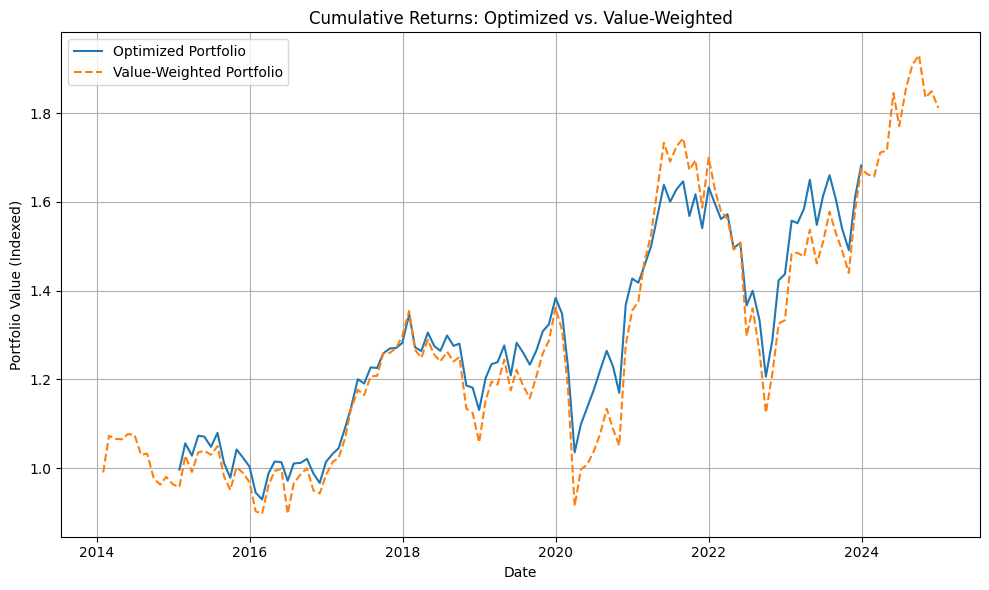

In [ ]:
# Ensure your returns are Series
returns_opt = ptf_returns3.squeeze()
returns_vw = df_vw_new.squeeze()

# Compute metrics
def compute_metrics(returns, name):
    ann_return = returns.mean() * 12
    ann_vol = returns.std() * np.sqrt(12)
    sharpe = (ann_return - avg_rf_rate) / ann_vol
    return {
        "Name": name,
        "Annualized Return": ann_return,
        "Annualized Volatility": ann_vol,
        "Sharpe Ratio": sharpe,
        "Min Monthly Return": returns.min(),
        "Max Monthly Return": returns.max()
    }

results = []
results.append(compute_metrics(returns_opt, "Optimized Portfolio"))
results.append(compute_metrics(returns_vw, "Value-Weighted Portfolio"))

# Show metrics
performance_df = pd.DataFrame(results).set_index("Name")
display(performance_df)

# Plot cumulative return
plt.figure(figsize=(10,6))
cum_opt = (1 + returns_opt).cumprod()
cum_vw = (1 + returns_vw).cumprod()

plt.plot(cum_opt, label="Optimized Portfolio")
plt.plot(cum_vw, label="Value-Weighted Portfolio", linestyle='--')
plt.title("Cumulative Returns: Optimized vs. Value-Weighted")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Indexed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Question 4 Homework 2

In [ ]:
CI_Y.head()

ISIN
AT0000652011    0.002097
AT0000743059    0.162133
AT0000831706    0.373588
AT0000908504    0.002258
AT0000937503    0.693486
Name: Carbon Intensity, dtype: float64

In [ ]:
WACI_y_vw

,Year,WACI_y_vw
0,2014,0.161399
1,2015,0.178502
2,2016,0.169718
3,2017,0.195820
4,2018,0.159208
5,2019,0.163048
6,2020,0.158530
7,2021,0.155982
8,2022,0.113799
9,2023,0.087829


In [ ]:
WACI_y_vw = WACI_y_vw[['WACI_y_vw', 'Year']].copy()
WACI_y_vw = WACI_y_vw.set_index('Year')
print(WACI_y_vw.head())

      WACI_y_vw
Year           
2014   0.161399
2015   0.178502
2016   0.169718
2017   0.195820
2018   0.159208


In [ ]:
waci_vw_dict={}
for year in range(2014, 2024):
  try:
      waci_vw_dict[year]=WACI_y_vw.loc[year]
  except KeyError:
      print(f"Warning: CI not found for year {year}")

waci_vw_dict

{2014: WACI_y_vw    0.161399
 Name: 2014, dtype: float64,
 2015: WACI_y_vw    0.178502
 Name: 2015, dtype: float64,
 2016: WACI_y_vw    0.169718
 Name: 2016, dtype: float64,
 2017: WACI_y_vw    0.19582
 Name: 2017, dtype: float64,
 2018: WACI_y_vw    0.159208
 Name: 2018, dtype: float64,
 2019: WACI_y_vw    0.163048
 Name: 2019, dtype: float64,
 2020: WACI_y_vw    0.15853
 Name: 2020, dtype: float64,
 2021: WACI_y_vw    0.155982
 Name: 2021, dtype: float64,
 2022: WACI_y_vw    0.113799
 Name: 2022, dtype: float64,
 2023: WACI_y_vw    0.087829
 Name: 2023, dtype: float64}

In [ ]:
# prompt: using w_Y, initialise a dictionary with the values of w_Y and with the year as the idnex

# Initialize the dictionary to store weights for each year
value_weighted_weights_dict = {}

# Iterate through the years and extract weights
for year in range(2014, 2024):
    try:
        value_weighted_weights_dict[year] = df_optimal_weights_waci.loc[year]
    except KeyError:
        print(f"Warning: Weights not found for year {year}")

# Display the dictionary (optional)
value_weighted_weights_dict


{2014: ISIN
 AT0000652011    2.239300e-03
 AT0000743059    5.195139e-07
 AT0000831706    2.725324e-07
 AT0000908504    1.902183e-03
 AT0000937503    7.035774e-07
                     ...     
 SE0000379190    6.363487e-09
 SE0000667891    1.413227e-03
 SE0000806994    9.521471e-07
 SE0003366871    6.646385e-07
 SE0005190238    3.307601e-03
 Name: 2014, Length: 381, dtype: float64,
 2015: ISIN
 AT0000652011    0.000088
 AT0000743059    0.000034
 AT0000831706    0.000651
 AT0000908504    0.006054
 AT0000937503    0.000025
                   ...   
 SE0000379190    0.000022
 SE0000667891    0.001240
 SE0000806994    0.000070
 SE0003366871    0.000061
 SE0005190238    0.003181
 Name: 2015, Length: 381, dtype: float64,
 2016: ISIN
 AT0000652011    0.000043
 AT0000743059    0.000094
 AT0000831706    0.000047
 AT0000908504    0.000116
 AT0000937503    0.000042
                   ...   
 SE0000379190    0.000064
 SE0000667891    0.001760
 SE0000806994    0.000083
 SE0003366871    0.000147
 SE0

In [ ]:
from scipy.optimize import minimize

theta = 0.10  # 10% reduction per year
Y0 = 2014
benchmark_waci_2014 = waci_vw_dict[2014]  # initial benchmark WACI

waci_nz_weights_dict = {}
years = range(2013, 2023)  # 2013 allocation -> 2014 return ... 2022 -> 2023

for year in years:
    if year not in cov_matrices_dict or year not in value_weighted_weights_dict:
        print(f"Skipping year {year} due to missing data.")
        continue

    cov_matrix = cov_matrices_dict[year]
    vw_weights = value_weighted_weights_dict[year]
    waci_vector = WACI_y_vw.reindex(cov_matrix.columns).fillna(0).values  # match order

    # Constraint for Net Zero target in year+1
    Y = year + 1
    waci_target = (1 - theta) ** (Y - Y0 + 1) * benchmark_waci_2014

    n_assets = len(cov_matrix)
    initial_guess = np.ones(n_assets) / n_assets
    bounds = [(0, 1)] * n_assets
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # weights sum to 1
        {'type': 'ineq', 'fun': lambda w: waci_target - np.dot(w, waci_vector)}  # WACI constraint
    ]

    def tracking_error(weights):
        diff = weights - vw_weights.values
        return diff.T @ cov_matrix.values @ diff

    result = minimize(tracking_error, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        weights_opt = pd.Series(result.x, index=cov_matrix.columns)
        waci_nz_weights_dict[year] = weights_opt
        print(f"Optimized Net Zero weights for year {year}")
    else:
        print(f"Optimization failed for year {year}")


Skipping year 2013 due to missing data.
Optimized Net Zero weights for year 2014
Optimized Net Zero weights for year 2015
Optimized Net Zero weights for year 2016
Optimized Net Zero weights for year 2017
Optimized Net Zero weights for year 2018
Optimized Net Zero weights for year 2019
Optimized Net Zero weights for year 2020
Optimized Net Zero weights for year 2021
Optimized Net Zero weights for year 2022


In [ ]:
# Initialize a dictionary to store WACI target values
waci_target_values = {}

# Loop through the years to check if the WACI constraint is met
for year in years:
    Y = year + 1  # The year we measure the WACI
    if Y < 2014 or Y > 2023 or Y not in portfolio_waci_nz:
        continue

    # Calculate the WACI target for the year
    waci_target = (1 - theta) ** (Y - Y0 + 1) * benchmark_waci_2014
    waci_target_values[Y] = waci_target

    # Check if the portfolio meets the WACI constraint
    meets_constraint = portfolio_waci_nz[Y] <= waci_target
    print(f"Year {Y}: Portfolio WACI = {portfolio_waci_nz[Y]:.2f}, Target = {waci_target:.2f}, Constraint Met: {meets_constraint}")

In [ ]:
# Convert the dictionary of optimized net zero weights into a DataFrame
optimized_nz_weights_df = pd.DataFrame(waci_nz_weights_dict)

# Rename the columns to represent the years
optimized_nz_weights_df.columns = [f"Year_{year}" for year in waci_nz_weights_dict.keys()]

# Display the resulting DataFrame
optimized_nz_weights_df

,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
ISIN,,,,,,,,,
AT0000652011,3.283128e-03,1.322520e-03,1.483776e-03,1.862169e-03,1.697822e-03,0.000000,1.457787e-03,0.000000e+00,9.581575e-20
AT0000743059,6.168975e-05,2.308268e-04,1.229748e-04,3.781611e-04,1.091687e-03,0.001402,1.983751e-18,0.000000e+00,0.000000e+00
AT0000831706,7.369187e-20,6.928730e-19,1.195905e-19,0.000000e+00,0.000000e+00,0.000000,1.406075e-19,8.809143e-20,8.809143e-19
AT0000908504,7.011892e-04,2.606895e-03,2.652472e-03,2.699141e-03,4.488423e-03,0.006276,7.598447e-03,5.613017e-03,5.294239e-03
AT0000937503,1.922765e-19,2.795209e-19,2.011174e-19,1.609363e-20,0.000000e+00,0.000000,1.225952e-03,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
SE0000379190,1.417280e-03,1.577175e-05,2.291272e-03,2.878157e-03,3.591127e-03,0.005289,3.201295e-03,2.855137e-03,3.523657e-19
SE0000667891,1.835295e-03,1.900206e-03,1.824584e-03,2.337128e-03,3.209207e-03,0.003622,3.956014e-03,6.440781e-03,4.043587e-03
SE0000806994,1.143494e-20,7.962110e-20,0.000000e+00,0.000000e+00,6.962611e-19,0.000718,1.287490e-19,3.579770e-04,0.000000e+00


In [ ]:
# Loop through each year in optimized_nz_weights_df
for year in optimized_nz_weights_df.columns:
    # Convert year correctly
    try:
        year_num = int(year.split('_')[1])  # If format is "something_YYYY"
    except:
        year_num = int(year)  # If format is just "YYYY"

    year_plus1 = year_num + 1
    start_date = f"{year_plus1}-01"
    end_date = f"{year_plus1}-12"

    # Select the relevant monthly returns for the year
    yearly_returns = returns4.loc[start_date:end_date]  # This works for monthly data

    if not yearly_returns.empty:
        # Align weights with the columns of returns4
        weights = optimized_nz_weights_df[year].reindex(yearly_returns.columns).fillna(0)

        # Compute the portfolio return for the year
        portfolio_return = (yearly_returns * weights).sum(axis=1).mean()
        yearly_portfolio_returns[year_plus1] = portfolio_return
    else:
        print(f"Returns data for {year_plus1} is missing, skipping...")

# Convert the dictionary to a DataFrame for better visualization
yearly_portfolio_returns_df = pd.DataFrame.from_dict(yearly_portfolio_returns, orient='index', columns=['Portfolio Return'])

# Display the yearly portfolio returns
print(yearly_portfolio_returns_df)

      Portfolio Return
2015          0.000551
2016          0.002004
2017          0.019647
2018         -0.009845
2019          0.017484
2020          0.008691
2021          0.011973
2022         -0.008940
2023          0.014110


In [ ]:
import numpy as np
import pandas as pd

# Ensure the index is datetime
returns4.index = pd.to_datetime(returns4.index)

# Initialize storage for monthly portfolio returns
monthly_returns = []
monthly_dates = []
monthly_weights = []  # Optional: to track weights over time

# Loop through years (allocating at end of Y, holding in Y+1)
for year in optimized_nz_weights_df.columns:
    try:
        # Extract weights for the current year
        weights = optimized_nz_weights_df[year]
    except KeyError:
        print(f"Warning: No data for year {year}, skipping...")
        continue

    # Convert year format (in case it's stored as "something_YYYY")
    try:
        year_num = int(year.split('_')[1])  # If format is "something_YYYY"
    except:
        year_num = int(year)  # If format is just "YYYY"

    # Define the next year for return computation
    year_plus1 = year_num + 1
    start_date = f"{year_plus1}-01-01"
    end_date = f"{year_plus1}-12-31"

    # Get return data for Y+1
    monthly_ret = returns4.loc[start_date:end_date]

    if monthly_ret.empty:
        print(f"Returns data for {year_plus1} is missing, skipping...")
        continue

    # Align ISINs between weights and return columns
    weights = weights.reindex(monthly_ret.columns).fillna(0).copy()

    # Loop over each month
    for i in range(len(monthly_ret)):
        ret_month = monthly_ret.iloc[i]
        date = monthly_ret.index[i]

        # Compute monthly portfolio return
        port_return = np.dot(weights, ret_month)
        monthly_returns.append(port_return)
        monthly_dates.append(date)
        monthly_weights.append(weights.copy())  # Store current weights

        # Update weights for next month (compounding)
        weights = weights * (1 + ret_month)
        weights = weights / weights.sum()  # Normalize back to 1

# Create a DataFrame with monthly returns
df_portfolio_returns = pd.DataFrame({
    "Date": monthly_dates,
    "Portfolio Return": monthly_returns
})
df_portfolio_returns.set_index("Date", inplace=True)

# Store in a variable
ptf_returns4 = df_portfolio_returns

# Display results
ptf_returns4

,Portfolio Return
Date,
2015-01-30,-0.003427
2015-02-27,0.059540
2015-03-31,-0.026304
2015-04-30,0.043698
2015-05-29,-0.001975
...,...
2023-08-31,-0.033615
2023-09-29,-0.040241
2023-10-31,-0.031525


In [ ]:
#rename columns
optimized_nz_weights_df.columns = optimized_nz_weights_df.columns.str.replace("Year_", "").astype(int)


In [ ]:
#loop valid years
valid_years = set(optimized_nz_weights_df.columns) & set(cov_matrices_dict.keys()) & set(value_weighted_weights_dict.keys())


In [ ]:
# Initialize a dictionary to store portfolio volatilities for each year
portfolio_volatility_dict = {}

# Loop through each year in the range
for year in valid_years:

    try:
        # Extract the covariance matrix, optimized weights, and value-weighted weights for the year
        cov_matrix = cov_matrices_dict[year]
        optimized_weights = optimized_nz_weights_df[year]
        vw_weights = value_weighted_weights_dict[year]

        # Ensure the covariance matrix and weights are aligned
        optimized_weights = optimized_weights.reindex(cov_matrix.index).fillna(0).values
        vw_weights = vw_weights.reindex(cov_matrix.index).fillna(0).values

        # Compute portfolio volatility
        portfolio_volatility = np.sqrt(optimized_weights.T @ cov_matrix.values @ optimized_weights)

        # Store the result in the dictionary
        portfolio_volatility_dict[year] = portfolio_volatility

    except KeyError:
        print(f"Data missing for year {year}, skipping...")
        continue

# Convert the dictionary to a DataFrame for better visualization
portfolio_volatility_df = pd.DataFrame.from_dict(portfolio_volatility_dict, orient='index', columns=['Portfolio Volatility'])

# Display the portfolio volatilities
portfolio_volatility_df

,Portfolio Volatility
2016,0.052739
2017,0.054448
2018,0.049823
2019,0.042609
2020,0.044455
2021,0.040408
2022,0.042225
2014,0.053413
2015,0.053346


In [ ]:
# Initialize a dictionary to store portfolio volatilities for each month
portfolio_volatility_dict = {}

# Generate a list of months (YYYY-MM) based on available years
valid_months = [
    f"{year}-{month:02d}" for year in valid_years for month in range(1, 13)
]

# Loop through each month
for month in valid_months:
    try:
        year, month_num = map(int, month.split("-"))  # Extract year and month

        # Extract the yearly covariance matrix and weights (using the same data for all months of that year)
        cov_matrix = cov_matrices_dict[year]  # Use the yearly covariance matrix
        optimized_weights = optimized_nz_weights_df[year]  # Use the yearly optimized weights
        vw_weights = value_weighted_weights_dict[year]  # Use the yearly value-weighted weights

        # Ensure the covariance matrix and weights are aligned
        optimized_weights = optimized_weights.reindex(cov_matrix.index).fillna(0).values
        vw_weights = vw_weights.reindex(cov_matrix.index).fillna(0).values

        # Compute portfolio volatility
        portfolio_volatility = np.sqrt(optimized_weights.T @ cov_matrix.values @ optimized_weights)

        # Store the result in the dictionary with a 'YYYY-MM' key
        portfolio_volatility_dict[month] = portfolio_volatility

    except KeyError:
        print(f"Data missing for {month}, skipping...")
        continue

# Convert the dictionary to a DataFrame for better visualization
portfolio_volatility_df = pd.DataFrame.from_dict(portfolio_volatility_dict, orient='index', columns=['Portfolio Volatility'])

# Display the portfolio volatilities
portfolio_volatility_df


,Portfolio Volatility
2016-01,0.052739
2016-02,0.052739
2016-03,0.052739
2016-04,0.052739
2016-05,0.052739
...,...
2015-08,0.053346
2015-09,0.053346
2015-10,0.053346
2015-11,0.053346


,Annualized Return,Annualized Volatility,Sharpe Ratio,Min Monthly Return,Max Monthly Return
Name,,,,,
Value-Weighted Portfolio,0.071738,0.186739,-9.083588,-0.225577,0.215792
Net-Zero Portfolio,0.070805,0.160876,-10.549716,-0.158075,0.169998


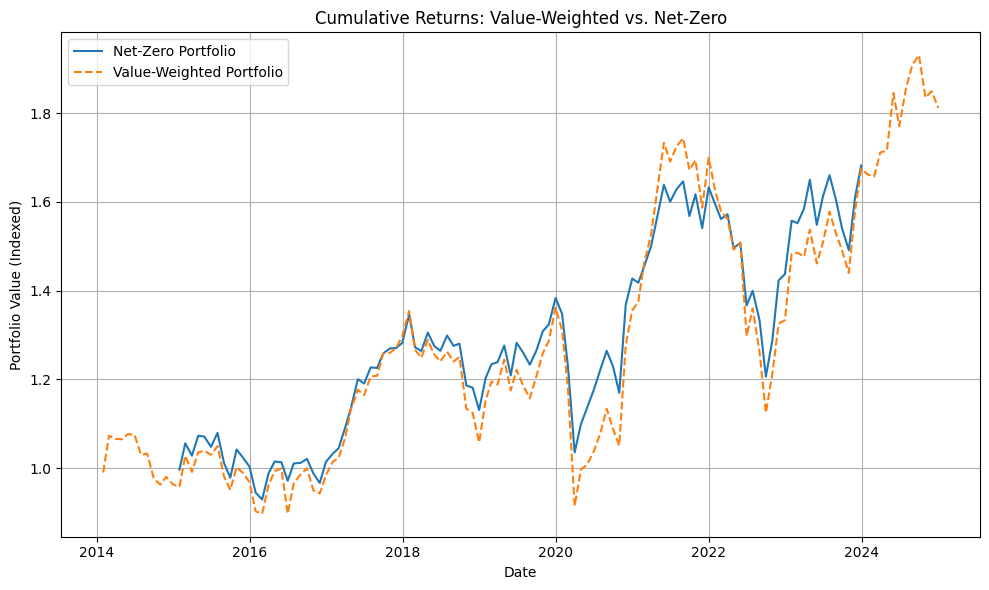

In [ ]:
# Ensure your returns are Series
returns_vw = df_vw_new.squeeze()
returns_nz = ptf_returns4.squeeze()  # Net-zero portfolio returns

# Compute metrics
def compute_metrics(returns, name):
    ann_return = returns.mean() * 12
    ann_vol = returns.std() * np.sqrt(12)
    sharpe = (ann_return - avg_rf_rate) / ann_vol
    return {
        "Name": name,
        "Annualized Return": ann_return,
        "Annualized Volatility": ann_vol,
        "Sharpe Ratio": sharpe,
        "Min Monthly Return": returns.min(),
        "Max Monthly Return": returns.max()
    }

results = []
results.append(compute_metrics(returns_vw, "Value-Weighted Portfolio"))
results.append(compute_metrics(returns_nz, "Net-Zero Portfolio"))

# Show metrics
performance_df = pd.DataFrame(results).set_index("Name")
display(performance_df)

# Plot cumulative return
plt.figure(figsize=(10,6))
cum_vw = (1 + returns_vw).cumprod()
cum_nz = (1 + returns_nz).cumprod()

plt.plot(cum_nz, label="Net-Zero Portfolio")
plt.plot(cum_vw, label="Value-Weighted Portfolio", linestyle='--')
plt.title("Cumulative Returns: Value-Weighted vs. Net-Zero")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Indexed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

,Annualized Return,Annualized Volatility,Sharpe Ratio,Min Monthly Return,Max Monthly Return
Name,,,,,
Value-Weighted Portfolio,0.071738,0.186739,-9.083588,-0.225577,0.215792
Net-Zero Portfolio,0.070805,0.160876,-10.549716,-0.158075,0.169998
Optimized Portfolio,0.070805,0.160876,-10.549716,-0.158075,0.169998


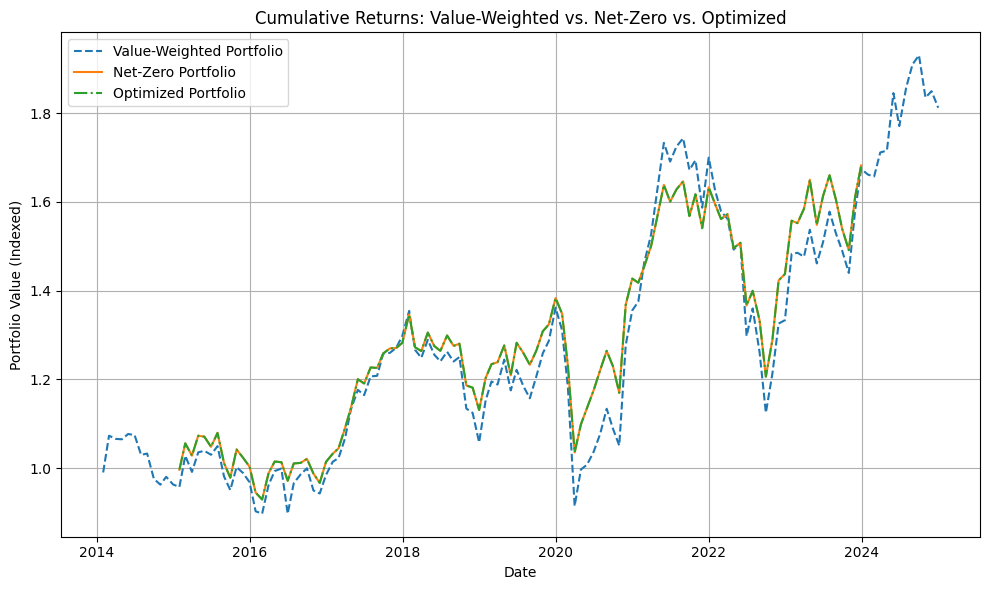

In [ ]:
# Ensure your returns are Series
returns_vw = df_vw_new.squeeze()
returns_nz = ptf_returns4.squeeze()  # Net-zero portfolio returns
returns_opt = ptf_returns3.squeeze()  # Optimized portfolio returns

# Compute metrics
def compute_metrics(returns, name):
    ann_return = returns.mean() * 12
    ann_vol = returns.std() * np.sqrt(12)
    sharpe = (ann_return - avg_rf_rate) / ann_vol
    return {
        "Name": name,
        "Annualized Return": ann_return,
        "Annualized Volatility": ann_vol,
        "Sharpe Ratio": sharpe,
        "Min Monthly Return": returns.min(),
        "Max Monthly Return": returns.max()
    }

results = []
results.append(compute_metrics(returns_vw, "Value-Weighted Portfolio"))
results.append(compute_metrics(returns_nz, "Net-Zero Portfolio"))
results.append(compute_metrics(returns_opt, "Optimized Portfolio"))

# Show metrics
performance_df = pd.DataFrame(results).set_index("Name")
display(performance_df)

# Plot cumulative return
plt.figure(figsize=(10, 6))
cum_vw = (1 + returns_vw).cumprod()
cum_nz = (1 + returns_nz).cumprod()
cum_opt = (1 + returns_opt).cumprod()

plt.plot(cum_vw, label="Value-Weighted Portfolio", linestyle='--')
plt.plot(cum_nz, label="Net-Zero Portfolio")
plt.plot(cum_opt, label="Optimized Portfolio", linestyle='-.')
plt.title("Cumulative Returns: Value-Weighted vs. Net-Zero vs. Optimized")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Indexed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data

,NAME,ISIN,Country Code,TotalCarbon,Revenue,Carbon_Intensity,log_Revenue,log_Carbon_Intensity
0,3I GROUP,GB00B1YW4409,GB,533.9,1480176.7,0.000361,14.207672,-7.927463
1,4IMPRINT GROUP,GB0006640972,GB,3092.4,646495.8,0.004783,13.379322,-5.342619
2,A P MOLLER MAERSK B,DK0010244508,DK,35445900.0,45804417.6,0.773853,17.639891,-0.256373
3,A2A,IT0001233417,IT,7174858.1,9298433.5,0.771620,16.045357,-0.259263
4,ABB LTD N,CH0012221716,CH,906088.7,32836502.4,0.027594,17.307051,-3.590159
...,...,...,...,...,...,...,...,...
462,YARA INTERNATIONAL,NO0010208051,NO,15280000.0,13790764.9,1.107988,16.439510,0.102546
463,YIT,FI0009800643,FI,61398.7,2800382.0,0.021925,14.845266,-3.820122
464,ZARDOYA OTIS DEAD - DELIST.09/05/22,ES0184933812,ES,33650.7,894407.6,0.037623,13.703917,-3.280128
465,ZIGUP,GB00B41H7391,GB,13367.5,1090083.8,0.012263,13.901765,-4.401183


In [ ]:
# Ensure optimized_weights is a pandas Series before reindexing
optimized_weights = optimized_nz_weights_df[period]  # or value_weighted_weights_df[period]

# Align the portfolio weights with the carbon intensity data
optimized_weights = optimized_weights.reindex(data['ISIN']).fillna(0)  # Ensure alignment with ISINs

# Extract the carbon intensity data for the assets in the portfolio for the current period
carbon_intensity = data.set_index('ISIN')['Carbon_Intensity']  # Ensure ISIN is the index
carbon_intensity = carbon_intensity.reindex(optimized_weights.index).fillna(0).values

# Convert optimized_weights to a NumPy array for computation
optimized_weights = optimized_weights.values

# Compute portfolio WACI
nz_portfolio_waci = np.sum(optimized_weights * carbon_intensity)


In [ ]:
portfolio_waci_nz = {}

for year in years:
    if year not in waci_nz_weights_dict or year not in waci_vw_dict:
        print(f"Skipping year {year} due to missing data.")
        continue

    # Retrieve the weights for the net zero portfolio
    weights = waci_nz_weights_dict[year]

    # Retrieve the WACI vector for the year
    waci_vector = waci_vw_dict[year].reindex(weights.index).fillna(0)  # Match order

    # Compute WACI of the portfolio
    waci_p = np.dot(weights, waci_vector)
    portfolio_waci_nz[year] = waci_p

print("Computed portfolio WACI for Net Zero portfolio.")
portfolio_waci_nz

Skipping year 2013 due to missing data.
Computed portfolio WACI for Net Zero portfolio.


{2014: np.float64(0.0),
 2015: np.float64(0.0),
 2016: np.float64(0.0),
 2017: np.float64(0.0),
 2018: np.float64(0.0),
 2019: np.float64(0.0),
 2020: np.float64(0.0),
 2021: np.float64(0.0),
 2022: np.float64(0.0)}